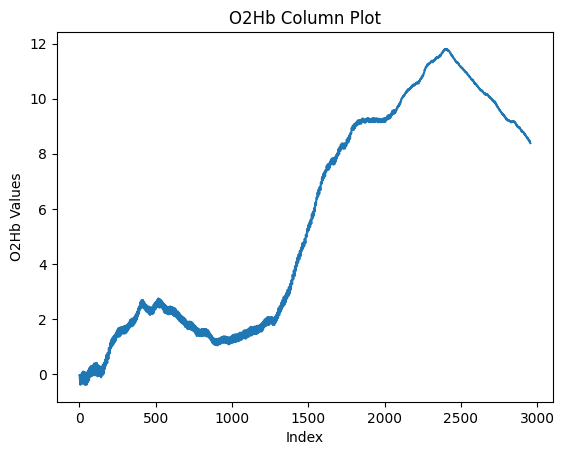

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/smomtahe/ai/main/ShadiNPy2.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Display the DataFrame
#print(df)

# Plot the "O2Hb" column
plt.plot(df['O2Hb'])
plt.title('O2Hb Column Plot')
plt.xlabel('Index')
plt.ylabel('O2Hb Values')
plt.show()

In [ ]:
df.head(10)

O2Hb       HHB       THb   HB_diff        TSI
0 -0.033861 -0.022068 -0.056028 -0.011793  93.721657
1 -0.041647 -0.010841 -0.052588 -0.030805  93.773041
2 -0.099589 -0.016017 -0.115705 -0.083572  93.865547
3 -0.157531 -0.021192 -0.178823 -0.136339  94.009415
4 -0.216161 -0.043120 -0.259381 -0.173041  93.880096
5 -0.298837 -0.048121 -0.347058 -0.250717  93.931488
6 -0.381514 -0.053121 -0.434735 -0.328392  93.981956
7 -0.323572 -0.047946 -0.371617 -0.275626  93.995033
8 -0.025387 -0.016542 -0.042029 -0.008845  93.814201
9 -0.008438 -0.005490 -0.014029 -0.002948  93.894340

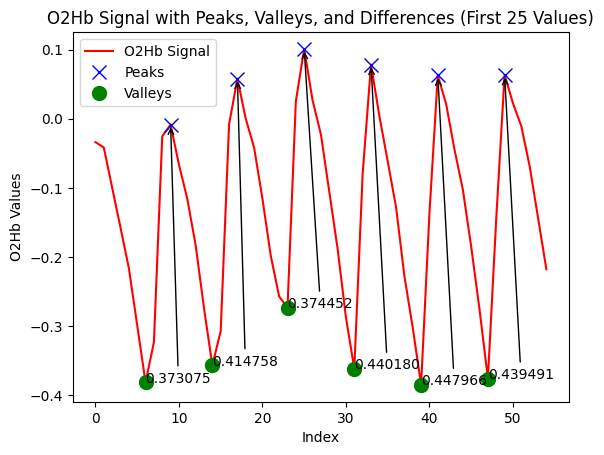

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/smomtahe/ai/main/ShadiNPy2.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Extract the "O2Hb" column for the first 25 values
o2hb_column = df['O2Hb'].head(55)

# Find peaks
peaks = [i for i in range(1, len(o2hb_column)-1) if o2hb_column.iloc[i] > o2hb_column.iloc[i-1] and o2hb_column.iloc[i] > o2hb_column.iloc[i+1]]

# Find valleys
valleys = [i for i in range(1, len(o2hb_column)-1) if o2hb_column.iloc[i] < o2hb_column.iloc[i-1] and o2hb_column.iloc[i] < o2hb_column.iloc[i+1]]

# Plot the signal with detected peaks and valleys
plt.plot(o2hb_column, label='O2Hb Signal', color='red')
plt.plot(peaks, o2hb_column.iloc[peaks], 'bx', label='Peaks', markersize=10)
plt.plot(valleys, o2hb_column.iloc[valleys], 'go', label='Valleys', markersize=10)

# Annotate with arrows showing the differences between peaks and valleys
for peak, valley in zip(peaks, valleys):
    diff = abs(o2hb_column.iloc[peak] - o2hb_column.iloc[valley])
    plt.annotate(f'{diff:.6f}', xy=(peak, o2hb_column.iloc[peak]), xytext=(valley, o2hb_column.iloc[valley]),
                 arrowprops=dict(arrowstyle='->', color='black'))

plt.title('O2Hb Signal with Peaks, Valleys, and Differences (First 25 Values)')
plt.xlabel('Index')
plt.ylabel('O2Hb Values')
plt.legend()
plt.show()


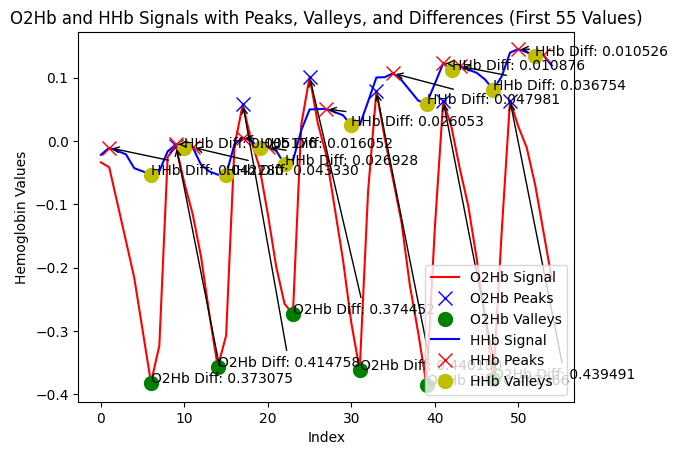

In [ ]:
## foe HHB

import pandas as pd
import matplotlib.pyplot as plt

# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/smomtahe/ai/main/ShadiNPy2.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Extract the "O2Hb" and "HHb" columns for the first 55 values
o2hb_column = df['O2Hb'].head(55)
hhb_column = df['HHB'].head(55)

# Find peaks for O2Hb
o2hb_peaks = [i for i in range(1, len(o2hb_column)-1) if o2hb_column.iloc[i] > o2hb_column.iloc[i-1] and o2hb_column.iloc[i] > o2hb_column.iloc[i+1]]

# Find valleys for O2Hb
o2hb_valleys = [i for i in range(1, len(o2hb_column)-1) if o2hb_column.iloc[i] < o2hb_column.iloc[i-1] and o2hb_column.iloc[i] < o2hb_column.iloc[i+1]]

# Find peaks for HHb
hhb_peaks = [i for i in range(1, len(hhb_column)-1) if hhb_column.iloc[i] > hhb_column.iloc[i-1] and hhb_column.iloc[i] > hhb_column.iloc[i+1]]

# Find valleys for HHb
hhb_valleys = [i for i in range(1, len(hhb_column)-1) if hhb_column.iloc[i] < hhb_column.iloc[i-1] and hhb_column.iloc[i] < hhb_column.iloc[i+1]]

# Plot the signals with detected peaks and valleys
plt.plot(o2hb_column, label='O2Hb Signal', color='red')
plt.plot(o2hb_peaks, o2hb_column.iloc[o2hb_peaks], 'bx', label='O2Hb Peaks', markersize=10)
plt.plot(o2hb_valleys, o2hb_column.iloc[o2hb_valleys], 'go', label='O2Hb Valleys', markersize=10)

plt.plot(hhb_column, label='HHb Signal', color='blue')
plt.plot(hhb_peaks, hhb_column.iloc[hhb_peaks], 'rx', label='HHb Peaks', markersize=10)
plt.plot(hhb_valleys, hhb_column.iloc[hhb_valleys], 'yo', label='HHb Valleys', markersize=10)

# Annotate with arrows showing the differences between O2Hb peaks and valleys
for o2hb_peak, o2hb_valley in zip(o2hb_peaks, o2hb_valleys):
    diff = abs(o2hb_column.iloc[o2hb_peak] - o2hb_column.iloc[o2hb_valley])
    plt.annotate(f'O2Hb Diff: {diff:.6f}', xy=(o2hb_peak, o2hb_column.iloc[o2hb_peak]), xytext=(o2hb_valley, o2hb_column.iloc[o2hb_valley]),
                 arrowprops=dict(arrowstyle='->', color='black'))

# Annotate with arrows showing the differences between HHb peaks and valleys
for hhb_peak, hhb_valley in zip(hhb_peaks, hhb_valleys):
    diff = abs(hhb_column.iloc[hhb_peak] - hhb_column.iloc[hhb_valley])
    plt.annotate(f'HHb Diff: {diff:.6f}', xy=(hhb_peak, hhb_column.iloc[hhb_peak]), xytext=(hhb_valley, hhb_column.iloc[hhb_valley]),
                 arrowprops=dict(arrowstyle='->', color='black'))

plt.title('O2Hb and HHb Signals with Peaks, Valleys, and Differences (First 55 Values)')
plt.xlabel('Index')
plt.ylabel('Hemoglobin Values')
plt.legend()
plt.show()




Difference between peak at index 9 and valley at index 6: 0.373075
Difference between peak at index 17 and valley at index 14: 0.414758
Difference between peak at index 25 and valley at index 23: 0.374452
Difference between peak at index 33 and valley at index 31: 0.440180
Difference between peak at index 41 and valley at index 39: 0.447966
Difference between peak at index 49 and valley at index 47: 0.439491
Difference between peak at index 57 and valley at index 55: 0.431017
Difference between peak at index 65 and valley at index 63: 0.455751
Difference between peak at index 73 and valley at index 71: 0.381549
Difference between peak at index 81 and valley at index 78: 0.373075
Difference between peak at index 89 and valley at index 86: 0.380861
Difference between peak at index 96 and valley at index 94: 0.389335
Difference between peak at index 104 and valley at index 102: 0.431017
Difference between peak at index 112 and valley at index 110: 0.447277
Difference between peak at index

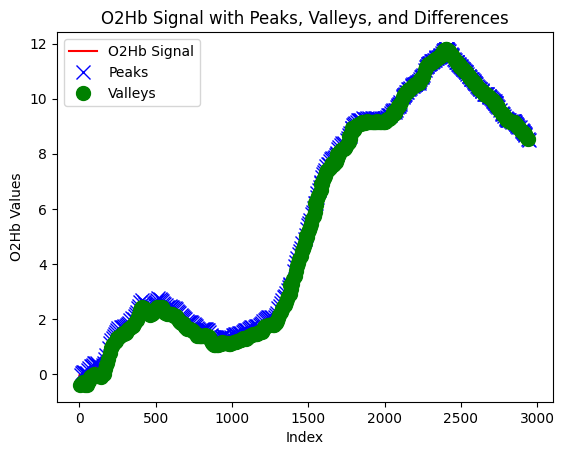

List of Differences: [0.3730752, 0.4147575, 0.374452, 0.4401799, 0.4479657, 0.4394915, 0.4310174, 0.45575140000000003, 0.38154940000000004, 0.3730753, 0.380861, 0.38933520000000005, 0.4310174, 0.4472773, 0.4140692, 0.3568153, 0.3391788, 0.380861, 0.3242956, 0.22467120000000002, 0.21619700000000003, 0.29177580000000003, 0.3978092999999999, 0.38017270000000003, 0.3144448000000001, 0.30597070000000004, 0.30597070000000004, 0.28902249999999996, 0.2981849000000001, 0.2727625, 0.3059706, 0.33573699999999995, 0.31169139999999995, 0.2622232, 0.2615350999999999, 0.2862690000000001, 0.2940547, 0.3045939, 0.31237970000000015, 0.3364252999999999, 0.33367210000000025, 0.2913013, 0.35840589999999994, 0.4156598, 0.44177050000000007, 0.4997125, 0.4905503, 0.5244464999999998, 0.4997126999999999, 0.2722880999999999, 0.1316695000000001, 0.07441600000000026, 0.08220170000000016, 0.1154096, 0.14861790000000008, 0.15846880000000008, 0.24961900000000004, 0.38313989999999976, 0.40856239999999966, 0.4445237999

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/smomtahe/ai/main/ShadiNPy2.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Extract the "O2Hb" column
o2hb_column = df['O2Hb']

# Find peaks
peaks = [i for i in range(1, len(o2hb_column)-1) if o2hb_column.iloc[i] > o2hb_column.iloc[i-1] and o2hb_column.iloc[i] > o2hb_column.iloc[i+1]]

# Find valleys
valleys = [i for i in range(1, len(o2hb_column)-1) if o2hb_column.iloc[i] < o2hb_column.iloc[i-1] and o2hb_column.iloc[i] < o2hb_column.iloc[i+1]]

# Annotate with arrows showing the differences between peaks and valleys
differences = []
for peak, valley in zip(peaks, valleys):
    diff = abs(o2hb_column.iloc[peak] - o2hb_column.iloc[valley])
    differences.append(diff)
    print(f'Difference between peak at index {peak} and valley at index {valley}: {diff:.6f}')

# Plot the signal with detected peaks and valleys (optional, comment if not needed)
plt.plot(o2hb_column, label='O2Hb Signal', color='red')
plt.plot(peaks, o2hb_column.iloc[peaks], 'bx', label='Peaks', markersize=10)
plt.plot(valleys, o2hb_column.iloc[valleys], 'go', label='Valleys', markersize=10)
plt.title('O2Hb Signal with Peaks, Valleys, and Differences')
plt.xlabel('Index')
plt.ylabel('O2Hb Values')
plt.legend()
plt.show()

# Print the list of differences
print("List of Differences:", differences)


In [ ]:
# Print the number of values in the List of Differences
print("Number of Values in List of Differences:", len(differences))


Number of Values in List of Differences: 443


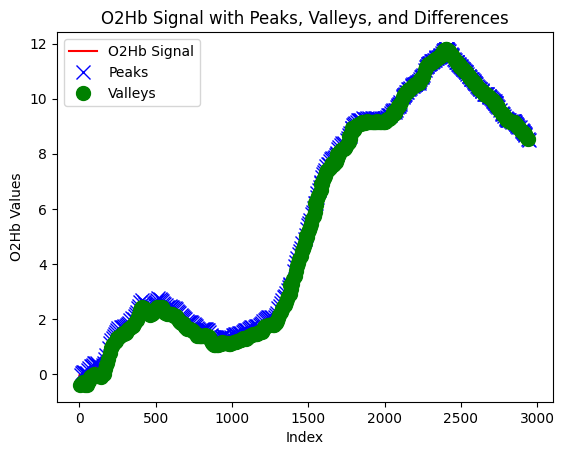

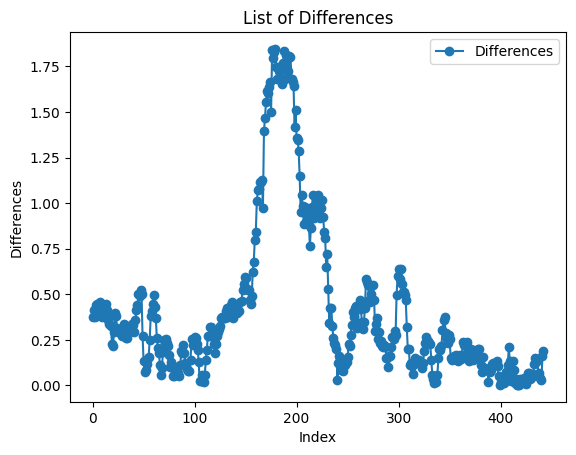

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/smomtahe/ai/main/ShadiNPy2.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Extract the "O2Hb" column
o2hb_column = df['O2Hb']

# Find peaks
peaks = [i for i in range(1, len(o2hb_column)-1) if o2hb_column.iloc[i] > o2hb_column.iloc[i-1] and o2hb_column.iloc[i] > o2hb_column.iloc[i+1]]

# Find valleys
valleys = [i for i in range(1, len(o2hb_column)-1) if o2hb_column.iloc[i] < o2hb_column.iloc[i-1] and o2hb_column.iloc[i] < o2hb_column.iloc[i+1]]

# Annotate with arrows showing the differences between peaks and valleys
differences = []
for peak, valley in zip(peaks, valleys):
    diff = abs(o2hb_column.iloc[peak] - o2hb_column.iloc[valley])
    differences.append(diff)
    #print(f'Difference between peak at index {peak} and valley at index {valley}: {diff:.6f}')

# Plot the signal with detected peaks and valleys (optional, comment if not needed)
plt.plot(o2hb_column, label='O2Hb Signal', color='red')
plt.plot(peaks, o2hb_column.iloc[peaks], 'bx', label='Peaks', markersize=10)
plt.plot(valleys, o2hb_column.iloc[valleys], 'go', label='Valleys', markersize=10)
plt.title('O2Hb Signal with Peaks, Valleys, and Differences')
plt.xlabel('Index')
plt.ylabel('O2Hb Values')
plt.legend()

# Plot the list of differences
plt.figure()
plt.plot(differences, label='Differences', marker='o')
plt.title('List of Differences')
plt.xlabel('Index')
plt.ylabel('Differences')
plt.legend()
plt.show()




In [ ]:
import pandas as pd
import numpy as np

# Assuming you have AC, TSI, and PI data in separate columns in a DataFrame
# Replace 'your_data.csv' with the actual file or data source
df = pd.read_csv('https://raw.githubusercontent.com/smomtahe/ai/main/AC.csv')

# Assuming AC, TSI, and PI columns are named 'AC', 'TSI', and 'PI' respectively
ac_values = df['AC']
tsi_values = df['TSI']
pi_values = df['PI']

# Number of values to keep (e.g., 296)
target_length = 296

# Adjust the length of AC by averaging
ac_averaged = ac_values.groupby(np.arange(len(ac_values)) // (len(ac_values) / target_length)).mean()

# Adjust lengths of TSI and PI
tsi_trimmed = tsi_values[:target_length]
pi_trimmed = pi_values[:target_length]

# Create a new DataFrame with the adjusted AC, TSI, and PI values
aligned_df = pd.DataFrame({'AC': ac_averaged, 'TSI': tsi_trimmed, 'PI': pi_trimmed})

# Save the new DataFrame to an Excel file
aligned_df.to_excel('aligned_dat.xlsx', index=False)


In [ ]:
import pandas as pd
import numpy as np

# Assuming you have AC, TSI, and PI data in separate columns in a DataFrame
# Replace 'your_data.csv' with the actual file or data source
df = pd.read_csv('https://raw.githubusercontent.com/smomtahe/ai/main/ACdata.csv')

# Assuming AC, TSI, and PI columns are named 'AC', 'TSI', and 'PI' respectively
ac_values = df['AC']
tsi_values = df['TSI']
pi_values = df['PI']

# Number of values to keep (e.g., 296)
target_length = 296

# Adjust the length of AC by averaging
ac_averaged = ac_values.groupby(np.arange(len(ac_values)) // (len(ac_values) / target_length)).mean()

# Adjust lengths of TSI and PI
tsi_trimmed = tsi_values[:target_length]
pi_trimmed = pi_values[:target_length]

# Create a new DataFrame with the adjusted AC, TSI, and PI values
aligned_df = pd.DataFrame({'AC': ac_averaged, 'TSI': tsi_trimmed, 'PI': pi_trimmed})

# Save the new DataFrame to an Excel file
aligned_df.to_excel('aligned_dat.xlsx', index=False)


In [ ]:
import pandas as pd
import numpy as np

# Assuming you have data in a DataFrame
# Replace 'your_data.csv' with the actual file or data source
df = pd.read_csv('https://raw.githubusercontent.com/smomtahe/ai/main/ACdata.csv')

# Assuming O2Hb, HHB, HTb, and HB_diff columns are present in the DataFrame
o2hb_values = df['O2Hb']
hhb_values = df['HHB']
htb_values = df['HTb']
hb_diff_values = df['HB_diff']
tsi_values = df['TSI']
pi_values = df['PI']

# Number of values to keep (e.g., 296)
target_length = 296

# Adjust the length of O2Hb, HHB, HTb, and HB_diff by averaging
o2hb_averaged = o2hb_values.groupby(np.arange(len(o2hb_values)) // (len(o2hb_values) / target_length)).mean()
hhb_averaged = hhb_values.groupby(np.arange(len(hhb_values)) // (len(hhb_values) / target_length)).mean()
htb_averaged = htb_values.groupby(np.arange(len(htb_values)) // (len(htb_values) / target_length)).mean()
hb_diff_averaged = hb_diff_values.groupby(np.arange(len(hb_diff_values)) // (len(hb_diff_values) / target_length)).mean()

# Adjust lengths of TSI and PI
tsi_trimmed = tsi_values[:target_length]
pi_trimmed = pi_values[:target_length]

# Create a new DataFrame with the adjusted columns
aligned_data = pd.DataFrame({
    'O2Hb': o2hb_averaged,
    'HHB': hhb_averaged,
    'HTb': htb_averaged,
    'HB_diff': hb_diff_averaged,
    'TSI': tsi_trimmed,
    'PI': pi_trimmed
})

# Save the new DataFrame to an Excel file
aligned_data.to_excel('aligned_data1.xlsx', index=False)


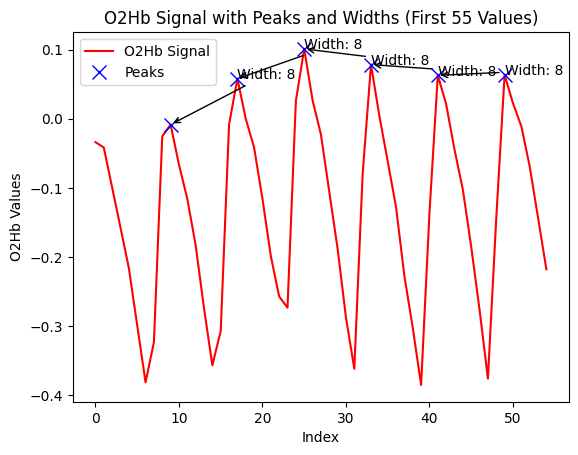

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/smomtahe/ai/main/ShadiNPy2.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Extract the "O2Hb" column for the first 55 values
o2hb_column = df['O2Hb'].head(55)

# Find peaks
peaks = [i for i in range(1, len(o2hb_column)-1) if o2hb_column.iloc[i] > o2hb_column.iloc[i-1] and o2hb_column.iloc[i] > o2hb_column.iloc[i+1]]

# Calculate the width (distance) between consecutive peaks
peak_widths = [peaks[i+1] - peaks[i] for i in range(len(peaks)-1)]

# Plot the signal with detected peaks and valleys
plt.plot(o2hb_column, label='O2Hb Signal', color='red')
plt.plot(peaks, o2hb_column.iloc[peaks], 'bx', label='Peaks', markersize=10)

# Annotate with arrows showing the peak widths
for i, width in enumerate(peak_widths):
    plt.annotate(f'Width: {width}', xy=(peaks[i], o2hb_column.iloc[peaks[i]]), xytext=(peaks[i+1], o2hb_column.iloc[peaks[i+1]]),
                 arrowprops=dict(arrowstyle='->', color='black'))

plt.title('O2Hb Signal with Peaks and Widths (First 55 Values)')
plt.xlabel('Index')
plt.ylabel('O2Hb Values')
plt.legend()
plt.show()


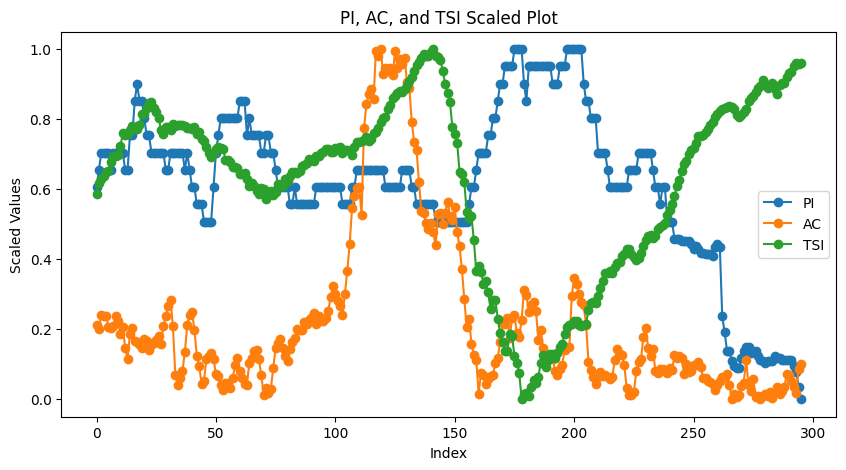

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/smomtahe/ai/main/aligned_data.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Ensure all columns are scaled between 0 and 1
df_scaled = (df - df.min()) / (df.max() - df.min())

# Plot figure: PI, AC, and TSI
plt.figure(figsize=(10, 5))

plt.plot(df_scaled['PI'], label='PI', linestyle='-', marker='o')
plt.plot(df_scaled['AC'], label='AC', linestyle='-', marker='o')
plt.plot(df_scaled['TSI'], label='TSI', linestyle='-', marker='o')

plt.title('PI, AC, and TSI Scaled Plot')
plt.xlabel('Index')
plt.ylabel('Scaled Values')
plt.legend()
plt.show()


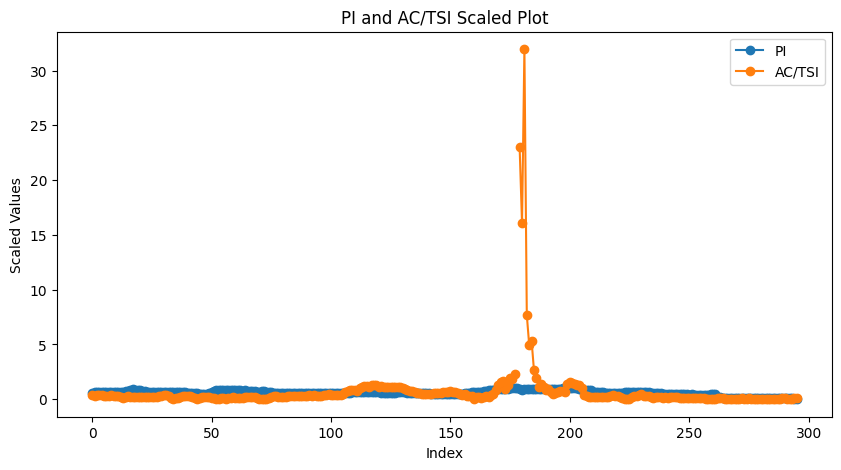

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/smomtahe/ai/main/aligned_data.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Ensure all columns are scaled between 0 and 1
df_scaled = (df - df.min()) / (df.max() - df.min())

# Calculate AC/TSI
df_scaled['AC/TSI'] = df_scaled['AC'] / df_scaled['TSI']

# Plot figure: PI and AC/TSI
plt.figure(figsize=(10, 5))

plt.plot(df_scaled['PI'], label='PI', linestyle='-', marker='o')
plt.plot(df_scaled['AC/TSI'], label='AC/TSI', linestyle='-', marker='o')

plt.title('PI and AC/TSI Scaled Plot')
plt.xlabel('Index')
plt.ylabel('Scaled Values')
plt.legend()
plt.show()


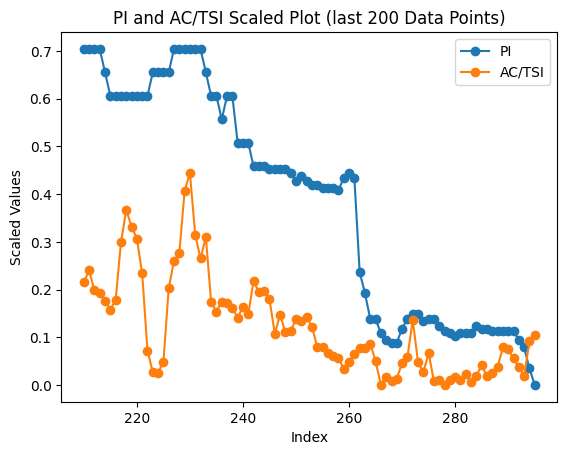

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/smomtahe/ai/main/aligned_data.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Ensure all columns are scaled between 0 and 1
df_scaled = (df - df.min()) / (df.max() - df.min())

# Calculate AC/TSI
df_scaled['AC/TSI'] = df_scaled['AC'] / df_scaled['TSI']

# Plot figure: PI and AC/TSI for the first 170 data points
plt.plot(df_scaled['PI'][210:], label='PI', linestyle='-', marker='o')
plt.plot(df_scaled['AC/TSI'][210:], label='AC/TSI', linestyle='-', marker='o')

plt.title('PI and AC/TSI Scaled Plot (last 200 Data Points)')
plt.xlabel('Index')
plt.ylabel('Scaled Values')
plt.legend()
plt.show()


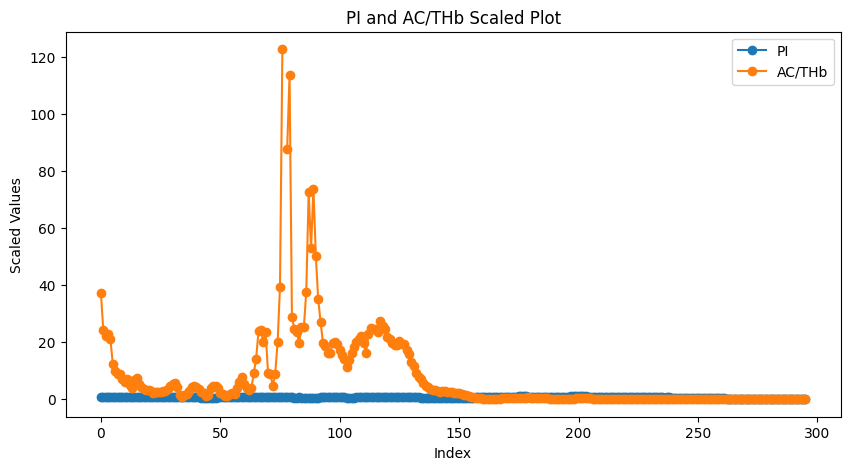

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/smomtahe/ai/main/aligned_data.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Ensure all columns are scaled between 0 and 1
df_scaled = (df - df.min()) / (df.max() - df.min())

# Calculate AC/TSI
df_scaled['AC/THb'] = df_scaled['AC'] / df_scaled['THb']

# Plot figure: PI and AC/TSI
plt.figure(figsize=(10, 5))

plt.plot(df_scaled['PI'], label='PI', linestyle='-', marker='o')
plt.plot(df_scaled['AC/THb'], label='AC/THb', linestyle='-', marker='o')

plt.title('PI and AC/THb Scaled Plot')
plt.xlabel('Index')
plt.ylabel('Scaled Values')
plt.legend()
plt.show()


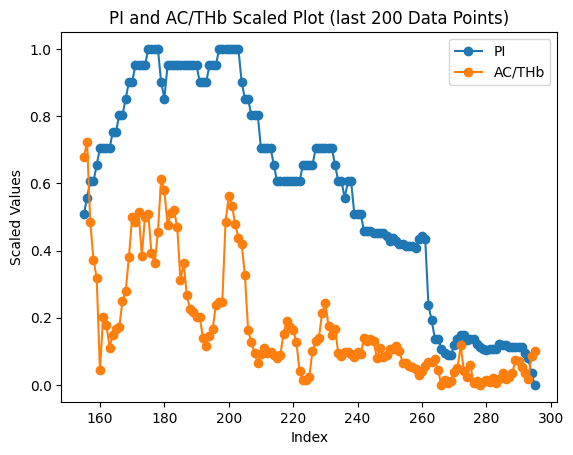

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/smomtahe/ai/main/aligned_data.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Ensure all columns are scaled between 0 and 1
df_scaled = (df - df.min()) / (df.max() - df.min())

# Calculate AC/TSI
df_scaled['AC/THb'] = df_scaled['AC'] / df_scaled['THb']

# Plot figure: PI and AC/TSI for the first 170 data points
plt.plot(df_scaled['PI'][155:], label='PI', linestyle='-', marker='o')
plt.plot(df_scaled['AC/THb'][155:], label='AC/THb', linestyle='-', marker='o')

plt.title('PI and AC/THb Scaled Plot (last 200 Data Points)')
plt.xlabel('Index')
plt.ylabel('Scaled Values')
plt.legend()
plt.show()


In [ ]:
#Filter

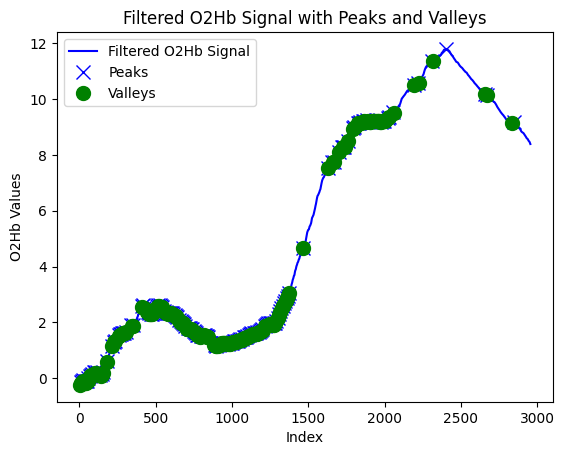

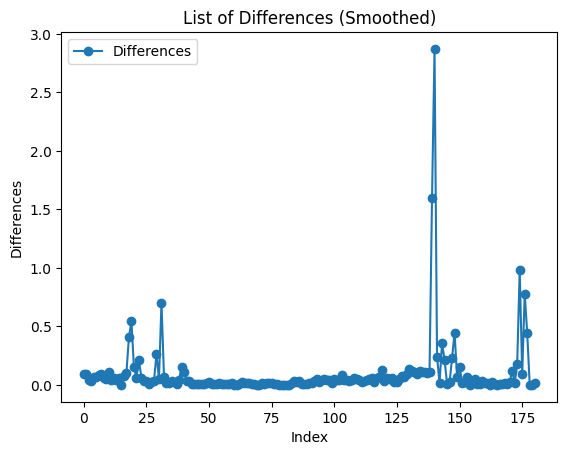

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Function to apply a low-pass Butterworth filter
def butter_lowpass_filter(data, cutoff_freq, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/smomtahe/ai/main/ShadiNPy2.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Extract the "O2Hb" column
o2hb_column = df['O2Hb']

# Apply a low-pass filter with a normalized cutoff frequency of 0.1
cutoff_frequency = 0.1  # Adjust as needed
sampling_rate = 1  # Assuming the data is sampled at 1 Hz, adjust as needed
filtered_o2hb = butter_lowpass_filter(o2hb_column, cutoff_frequency, sampling_rate)

# Find peaks
peaks = [i for i in range(1, len(filtered_o2hb)-1) if filtered_o2hb[i] > filtered_o2hb[i-1] and filtered_o2hb[i] > filtered_o2hb[i+1]]

# Find valleys
valleys = [i for i in range(1, len(filtered_o2hb)-1) if filtered_o2hb[i] < filtered_o2hb[i-1] and filtered_o2hb[i] < filtered_o2hb[i+1]]

# Annotate with arrows showing the differences between peaks and valleys
differences = []
for peak, valley in zip(peaks, valleys):
    diff = abs(filtered_o2hb[peak] - filtered_o2hb[valley])
    differences.append(diff)

# Save differences (AC values) to a CSV file
ac_values_df = pd.DataFrame({'ac_values': differences})
ac_values_df.to_csv('ac_values.csv', index=False)

# Plot the filtered signal with detected peaks and valleys
plt.plot(filtered_o2hb, label='Filtered O2Hb Signal', color='blue')
plt.plot(peaks, filtered_o2hb[peaks], 'bx', label='Peaks', markersize=10)
plt.plot(valleys, filtered_o2hb[valleys], 'go', label='Valleys', markersize=10)
plt.title('Filtered O2Hb Signal with Peaks and Valleys')
plt.xlabel('Index')
plt.ylabel('O2Hb Values')
plt.legend()

# Plot the list of differences
plt.figure()
plt.plot(differences, label='Differences', marker='o')
plt.title('List of Differences (Smoothed)')
plt.xlabel('Index')
plt.ylabel('Differences')
plt.legend()
plt.show()


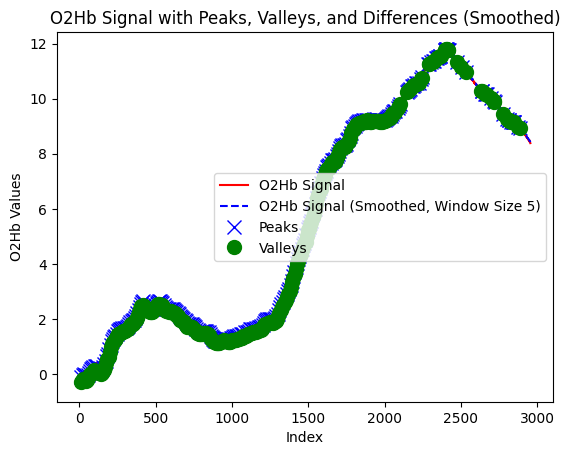

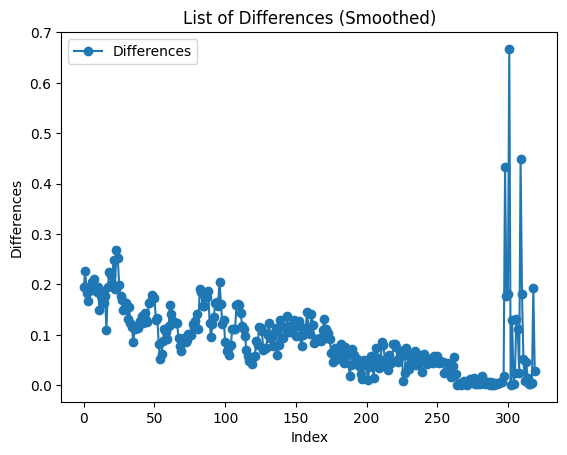

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/smomtahe/ai/main/ShadiNPy2.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Extract the "O2Hb" column
o2hb_column = df['O2Hb']

# Apply a moving average filter to smooth the signal
window_size = 5  # Adjust the window size as needed
o2hb_smoothed = o2hb_column.rolling(window=window_size).mean()

# Find peaks on the smoothed signal
peaks_smoothed = [i for i in range(1, len(o2hb_smoothed)-1) if o2hb_smoothed.iloc[i] > o2hb_smoothed.iloc[i-1] and o2hb_smoothed.iloc[i] > o2hb_smoothed.iloc[i+1]]

# Find valleys on the smoothed signal
valleys_smoothed = [i for i in range(1, len(o2hb_smoothed)-1) if o2hb_smoothed.iloc[i] < o2hb_smoothed.iloc[i-1] and o2hb_smoothed.iloc[i] < o2hb_smoothed.iloc[i+1]]

# Annotate with arrows showing the differences between peaks and valleys
differences = []
for peak, valley in zip(peaks_smoothed, valleys_smoothed):
    diff = abs(o2hb_smoothed.iloc[peak] - o2hb_smoothed.iloc[valley])
    differences.append(diff)

# Plot the original and smoothed signals with detected peaks and valleys
plt.plot(o2hb_column, label='O2Hb Signal', color='red')
plt.plot(o2hb_smoothed, label=f'O2Hb Signal (Smoothed, Window Size {window_size})', linestyle='--', color='blue')
plt.plot(peaks_smoothed, o2hb_smoothed.iloc[peaks_smoothed], 'bx', label='Peaks', markersize=10)
plt.plot(valleys_smoothed, o2hb_smoothed.iloc[valleys_smoothed], 'go', label='Valleys', markersize=10)
plt.title('O2Hb Signal with Peaks, Valleys, and Differences (Smoothed)')
plt.xlabel('Index')
plt.ylabel('O2Hb Values')
plt.legend()

# Plot the list of differences
plt.figure()
plt.plot(differences, label='Differences', marker='o')
plt.title('List of Differences (Smoothed)')
plt.xlabel('Index')
plt.ylabel('Differences')
plt.legend()
plt.show()


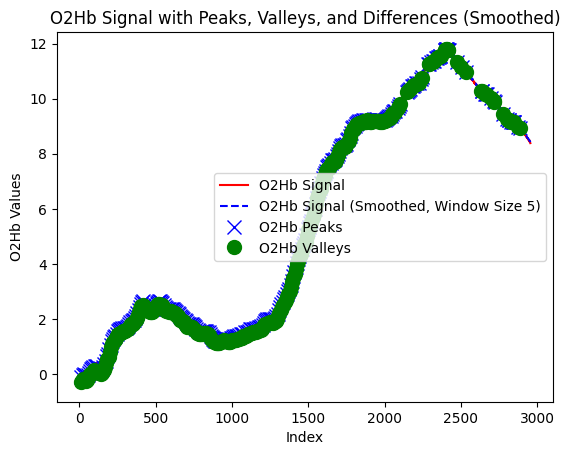

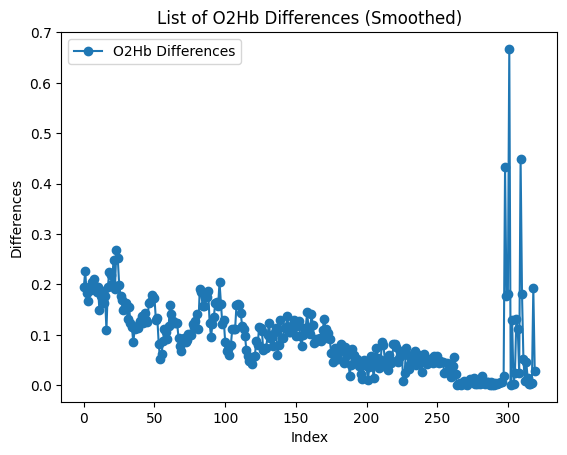

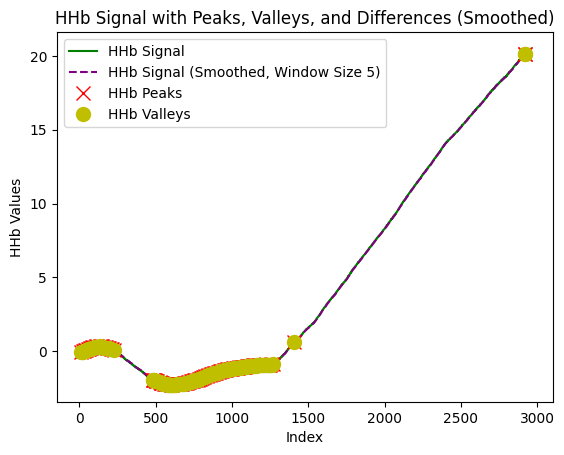

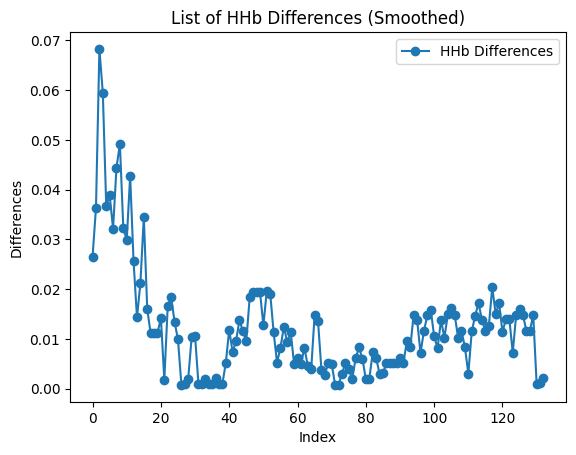

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/smomtahe/ai/main/ShadiNPy2.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Extract the "O2Hb" and "HHb" columns
o2hb_column = df['O2Hb']
hhb_column = df['HHB']

# Apply a moving average filter to smooth the signals
window_size = 5  # Adjust the window size as needed
o2hb_smoothed = o2hb_column.rolling(window=window_size).mean()
hhb_smoothed = hhb_column.rolling(window=window_size).mean()

# Find peaks on the smoothed O2Hb signal
peaks_o2hb_smoothed = [i for i in range(1, len(o2hb_smoothed)-1) if o2hb_smoothed.iloc[i] > o2hb_smoothed.iloc[i-1] and o2hb_smoothed.iloc[i] > o2hb_smoothed.iloc[i+1]]

# Find valleys on the smoothed O2Hb signal
valleys_o2hb_smoothed = [i for i in range(1, len(o2hb_smoothed)-1) if o2hb_smoothed.iloc[i] < o2hb_smoothed.iloc[i-1] and o2hb_smoothed.iloc[i] < o2hb_smoothed.iloc[i+1]]

# Find peaks on the smoothed HHb signal
peaks_hhb_smoothed = [i for i in range(1, len(hhb_smoothed)-1) if hhb_smoothed.iloc[i] > hhb_smoothed.iloc[i-1] and hhb_smoothed.iloc[i] > hhb_smoothed.iloc[i+1]]

# Find valleys on the smoothed HHb signal
valleys_hhb_smoothed = [i for i in range(1, len(hhb_smoothed)-1) if hhb_smoothed.iloc[i] < hhb_smoothed.iloc[i-1] and hhb_smoothed.iloc[i] < hhb_smoothed.iloc[i+1]]

# Annotate with arrows showing the differences between O2Hb peaks and valleys
differences_o2hb = []
for peak, valley in zip(peaks_o2hb_smoothed, valleys_o2hb_smoothed):
    diff = abs(o2hb_smoothed.iloc[peak] - o2hb_smoothed.iloc[valley])
    differences_o2hb.append(diff)

# Annotate with arrows showing the differences between HHb peaks and valleys
differences_hhb = []
for peak, valley in zip(peaks_hhb_smoothed, valleys_hhb_smoothed):
    diff = abs(hhb_smoothed.iloc[peak] - hhb_smoothed.iloc[valley])
    differences_hhb.append(diff)

# Plot the original and smoothed O2Hb signals with detected peaks and valleys
plt.plot(o2hb_column, label='O2Hb Signal', color='red')
plt.plot(o2hb_smoothed, label=f'O2Hb Signal (Smoothed, Window Size {window_size})', linestyle='--', color='blue')
plt.plot(peaks_o2hb_smoothed, o2hb_smoothed.iloc[peaks_o2hb_smoothed], 'bx', label='O2Hb Peaks', markersize=10)
plt.plot(valleys_o2hb_smoothed, o2hb_smoothed.iloc[valleys_o2hb_smoothed], 'go', label='O2Hb Valleys', markersize=10)
plt.title('O2Hb Signal with Peaks, Valleys, and Differences (Smoothed)')
plt.xlabel('Index')
plt.ylabel('O2Hb Values')
plt.legend()

# Plot the list of differences for O2Hb
plt.figure()
plt.plot(differences_o2hb, label='O2Hb Differences', marker='o')
plt.title('List of O2Hb Differences (Smoothed)')
plt.xlabel('Index')
plt.ylabel('Differences')
plt.legend()

# Plot the original and smoothed HHb signals with detected peaks and valleys
plt.figure()
plt.plot(hhb_column, label='HHb Signal', color='green')
plt.plot(hhb_smoothed, label=f'HHb Signal (Smoothed, Window Size {window_size})', linestyle='--', color='purple')
plt.plot(peaks_hhb_smoothed, hhb_smoothed.iloc[peaks_hhb_smoothed], 'rx', label='HHb Peaks', markersize=10)
plt.plot(valleys_hhb_smoothed, hhb_smoothed.iloc[valleys_hhb_smoothed], 'yo', label='HHb Valleys', markersize=10)
plt.title('HHb Signal with Peaks, Valleys, and Differences (Smoothed)')
plt.xlabel('Index')
plt.ylabel('HHb Values')
plt.legend()

# Plot the list of differences for HHb
plt.figure()
plt.plot(differences_hhb, label='HHb Differences', marker='o')
plt.title('List of HHb Differences (Smoothed)')
plt.xlabel('Index')
plt.ylabel('Differences')
plt.legend()

plt.show()


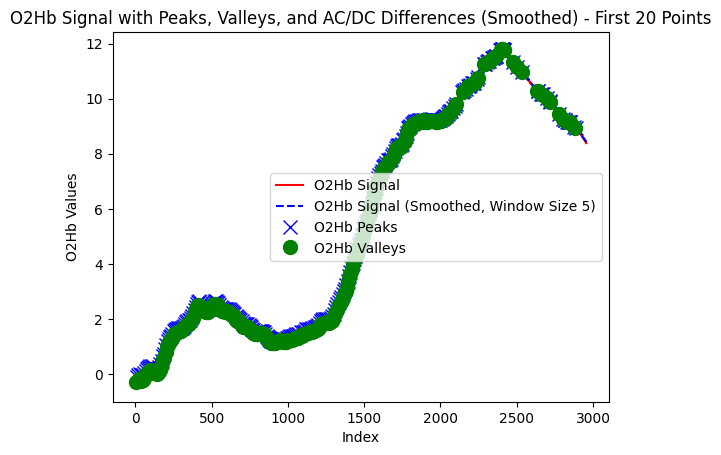

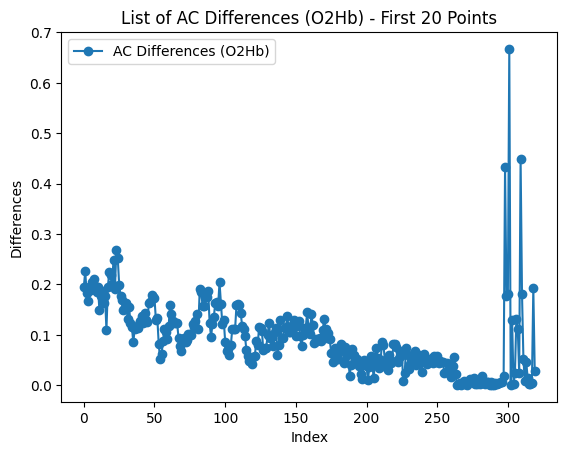

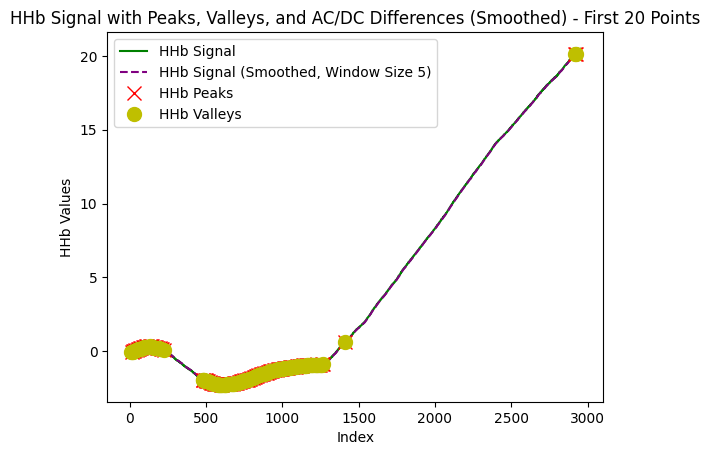

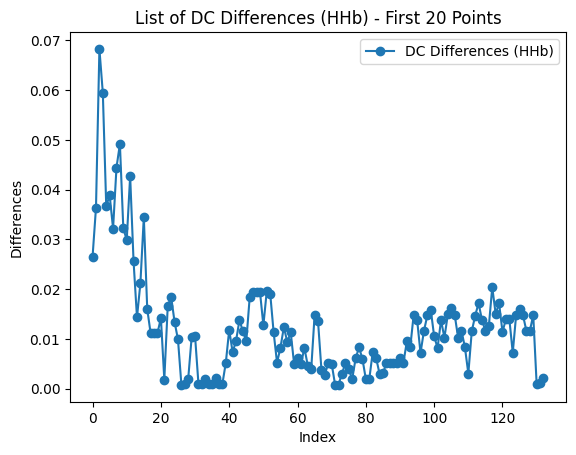

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/smomtahe/ai/main/ShadiNPy2.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Extract the "O2Hb" and "HHb" columns for the first 20 values
o2hb_column = df['O2Hb']
hhb_column = df['HHB']

# Apply a moving average filter to smooth the signals
window_size = 5  # Adjust the window size as needed
o2hb_smoothed = o2hb_column.rolling(window=window_size).mean()
hhb_smoothed = hhb_column.rolling(window=window_size).mean()

# Find peaks on the smoothed O2Hb signal
peaks_o2hb_smoothed = [i for i in range(1, len(o2hb_smoothed)-1) if o2hb_smoothed.iloc[i] > o2hb_smoothed.iloc[i-1] and o2hb_smoothed.iloc[i] > o2hb_smoothed.iloc[i+1]]

# Find valleys on the smoothed O2Hb signal
valleys_o2hb_smoothed = [i for i in range(1, len(o2hb_smoothed)-1) if o2hb_smoothed.iloc[i] < o2hb_smoothed.iloc[i-1] and o2hb_smoothed.iloc[i] < o2hb_smoothed.iloc[i+1]]

# Find peaks on the smoothed HHb signal
peaks_hhb_smoothed = [i for i in range(1, len(hhb_smoothed)-1) if hhb_smoothed.iloc[i] > hhb_smoothed.iloc[i-1] and hhb_smoothed.iloc[i] > hhb_smoothed.iloc[i+1]]

# Find valleys on the smoothed HHb signal
valleys_hhb_smoothed = [i for i in range(1, len(hhb_smoothed)-1) if hhb_smoothed.iloc[i] < hhb_smoothed.iloc[i-1] and hhb_smoothed.iloc[i] < hhb_smoothed.iloc[i+1]]

# Calculate AC (O2Hb) and DC (HHb) differences
ac_differences = [abs(o2hb_smoothed.iloc[peak] - o2hb_smoothed.iloc[valley]) for peak, valley in zip(peaks_o2hb_smoothed, valleys_o2hb_smoothed)]
dc_differences = [abs(hhb_smoothed.iloc[peak] - hhb_smoothed.iloc[valley]) for peak, valley in zip(peaks_hhb_smoothed, valleys_hhb_smoothed)]

# Plot the original and smoothed O2Hb signals with detected peaks and valleys
plt.plot(o2hb_column, label='O2Hb Signal', color='red')
plt.plot(o2hb_smoothed, label=f'O2Hb Signal (Smoothed, Window Size {window_size})', linestyle='--', color='blue')
plt.plot(peaks_o2hb_smoothed, o2hb_smoothed.iloc[peaks_o2hb_smoothed], 'bx', label='O2Hb Peaks', markersize=10)
plt.plot(valleys_o2hb_smoothed, o2hb_smoothed.iloc[valleys_o2hb_smoothed], 'go', label='O2Hb Valleys', markersize=10)
plt.title('O2Hb Signal with Peaks, Valleys, and AC/DC Differences (Smoothed) - First 20 Points')
plt.xlabel('Index')
plt.ylabel('O2Hb Values')
plt.legend()

# Plot the list of AC (O2Hb) differences
plt.figure()
plt.plot(ac_differences, label='AC Differences (O2Hb)', marker='o')
plt.title('List of AC Differences (O2Hb) - First 20 Points')
plt.xlabel('Index')
plt.ylabel('Differences')
plt.legend()

# Plot the original and smoothed HHb signals with detected peaks and valleys
plt.figure()
plt.plot(hhb_column, label='HHb Signal', color='green')
plt.plot(hhb_smoothed, label=f'HHb Signal (Smoothed, Window Size {window_size})', linestyle='--', color='purple')
plt.plot(peaks_hhb_smoothed, hhb_smoothed.iloc[peaks_hhb_smoothed], 'rx', label='HHb Peaks', markersize=10)
plt.plot(valleys_hhb_smoothed, hhb_smoothed.iloc[valleys_hhb_smoothed], 'yo', label='HHb Valleys', markersize=10)
plt.title('HHb Signal with Peaks, Valleys, and AC/DC Differences (Smoothed) - First 20 Points')
plt.xlabel('Index')
plt.ylabel('HHb Values')
plt.legend()

# Plot the list of DC (HHb) differences
plt.figure()
plt.plot(dc_differences, label='DC Differences (HHb)', marker='o')
plt.title('List of DC Differences (HHb) - First 20 Points')
plt.xlabel('Index')
plt.ylabel('Differences')
plt.legend()

plt.show()


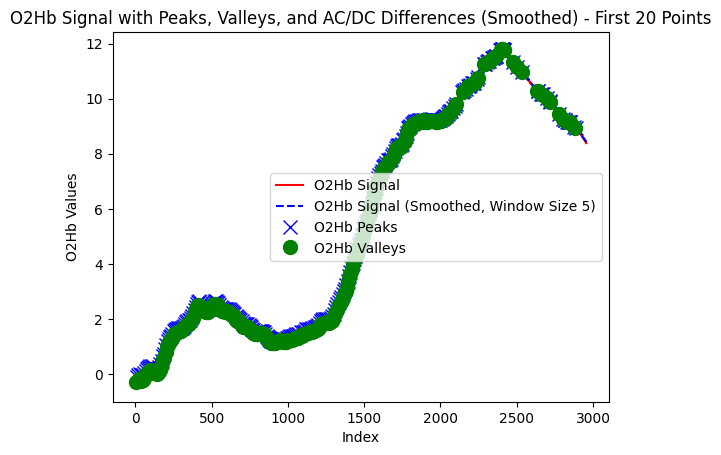

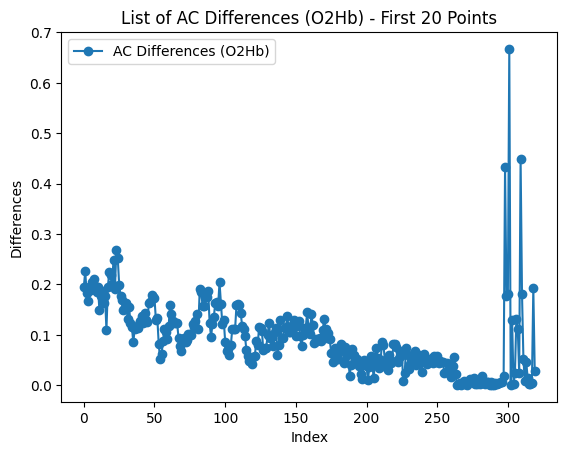

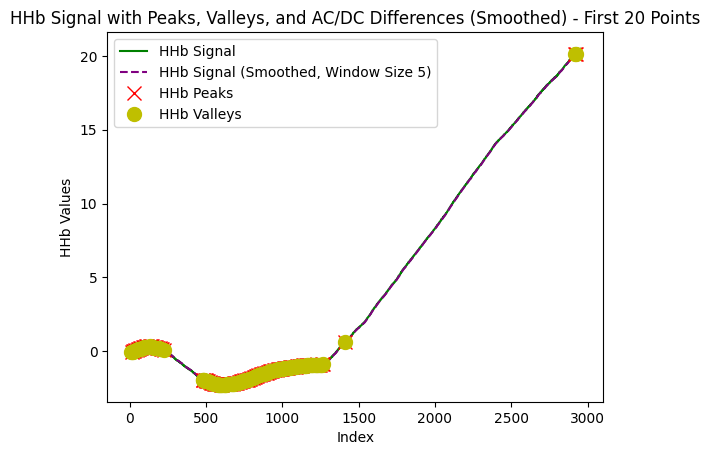

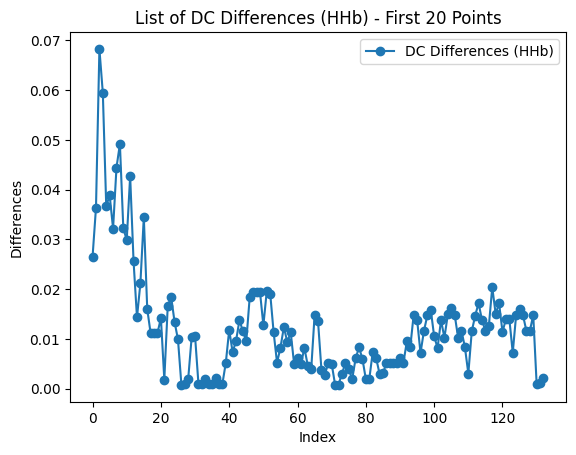

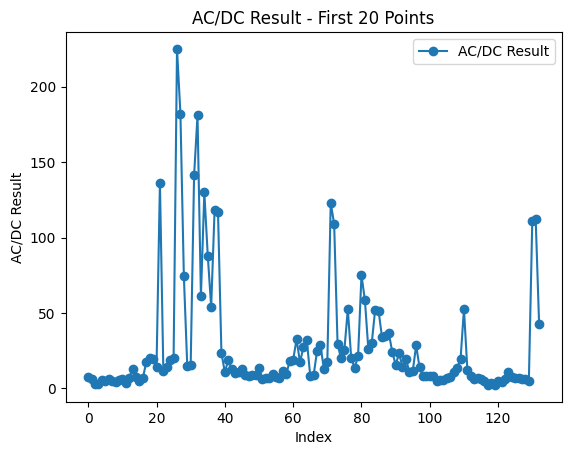

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/smomtahe/ai/main/ShadiNPy2.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Extract the "O2Hb" and "HHb" columns for the first 20 values
o2hb_column = df['O2Hb']
hhb_column = df['HHB']

# Apply a moving average filter to smooth the signals
window_size = 5  # Adjust the window size as needed
o2hb_smoothed = o2hb_column.rolling(window=window_size).mean()
hhb_smoothed = hhb_column.rolling(window=window_size).mean()

# Find peaks on the smoothed O2Hb signal
peaks_o2hb_smoothed = [i for i in range(1, len(o2hb_smoothed)-1) if o2hb_smoothed.iloc[i] > o2hb_smoothed.iloc[i-1] and o2hb_smoothed.iloc[i] > o2hb_smoothed.iloc[i+1]]

# Find valleys on the smoothed O2Hb signal
valleys_o2hb_smoothed = [i for i in range(1, len(o2hb_smoothed)-1) if o2hb_smoothed.iloc[i] < o2hb_smoothed.iloc[i-1] and o2hb_smoothed.iloc[i] < o2hb_smoothed.iloc[i+1]]

# Find peaks on the smoothed HHb signal
peaks_hhb_smoothed = [i for i in range(1, len(hhb_smoothed)-1) if hhb_smoothed.iloc[i] > hhb_smoothed.iloc[i-1] and hhb_smoothed.iloc[i] > hhb_smoothed.iloc[i+1]]

# Find valleys on the smoothed HHb signal
valleys_hhb_smoothed = [i for i in range(1, len(hhb_smoothed)-1) if hhb_smoothed.iloc[i] < hhb_smoothed.iloc[i-1] and hhb_smoothed.iloc[i] < hhb_smoothed.iloc[i+1]]

# Calculate AC (O2Hb) and DC (HHb) differences
ac_differences = [abs(o2hb_smoothed.iloc[peak] - o2hb_smoothed.iloc[valley]) for peak, valley in zip(peaks_o2hb_smoothed, valleys_o2hb_smoothed)]
dc_differences = [abs(hhb_smoothed.iloc[peak] - hhb_smoothed.iloc[valley]) for peak, valley in zip(peaks_hhb_smoothed, valleys_hhb_smoothed)]

# Calculate AC/DC result
ac_dc_result = [ac / (dc + 1e-10) for ac, dc in zip(ac_differences, dc_differences)]  # Avoid division by zero

# Plot the original and smoothed O2Hb signals with detected peaks and valleys
plt.plot(o2hb_column, label='O2Hb Signal', color='red')
plt.plot(o2hb_smoothed, label=f'O2Hb Signal (Smoothed, Window Size {window_size})', linestyle='--', color='blue')
plt.plot(peaks_o2hb_smoothed, o2hb_smoothed.iloc[peaks_o2hb_smoothed], 'bx', label='O2Hb Peaks', markersize=10)
plt.plot(valleys_o2hb_smoothed, o2hb_smoothed.iloc[valleys_o2hb_smoothed], 'go', label='O2Hb Valleys', markersize=10)
plt.title('O2Hb Signal with Peaks, Valleys, and AC/DC Differences (Smoothed) - First 20 Points')
plt.xlabel('Index')
plt.ylabel('O2Hb Values')
plt.legend()

# Plot the list of AC (O2Hb) differences
plt.figure()
plt.plot(ac_differences, label='AC Differences (O2Hb)', marker='o')
plt.title('List of AC Differences (O2Hb) - First 20 Points')
plt.xlabel('Index')
plt.ylabel('Differences')
plt.legend()

# Plot the original and smoothed HHb signals with detected peaks and valleys
plt.figure()
plt.plot(hhb_column, label='HHb Signal', color='green')
plt.plot(hhb_smoothed, label=f'HHb Signal (Smoothed, Window Size {window_size})', linestyle='--', color='purple')
plt.plot(peaks_hhb_smoothed, hhb_smoothed.iloc[peaks_hhb_smoothed], 'rx', label='HHb Peaks', markersize=10)
plt.plot(valleys_hhb_smoothed, hhb_smoothed.iloc[valleys_hhb_smoothed], 'yo', label='HHb Valleys', markersize=10)
plt.title('HHb Signal with Peaks, Valleys, and AC/DC Differences (Smoothed) - First 20 Points')
plt.xlabel('Index')
plt.ylabel('HHb Values')
plt.legend()

# Plot the list of DC (HHb) differences
plt.figure()
plt.plot(dc_differences, label='DC Differences (HHb)', marker='o')
plt.title('List of DC Differences (HHb) - First 20 Points')
plt.xlabel('Index')
plt.ylabel('Differences')
plt.legend()

# Plot the AC/DC result
plt.figure()
plt.plot(ac_dc_result, label='AC/DC Result', marker='o')
plt.title('AC/DC Result - First 20 Points')
plt.xlabel('Index')
plt.ylabel('AC/DC Result')
plt.legend()

plt.show()


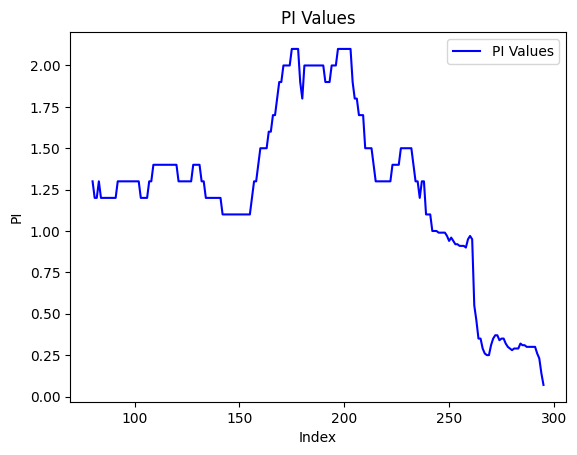

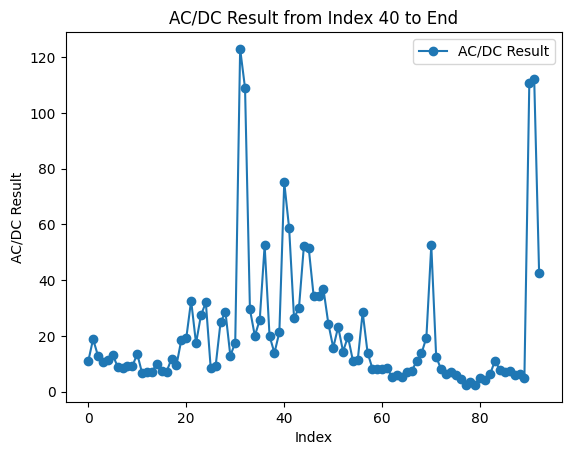

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have AC, TSI, and PI data in separate columns in a DataFrame
# Replace 'alignedData.xlsx' with the actual file or data source
df = pd.read_csv('https://raw.githubusercontent.com/smomtahe/ai/main/AC.csv')

# Extract PI values from the DataFrame
pi_values = df['PI'][80:]

# Plot PI values
plt.plot(pi_values, label='PI Values', color='blue')
plt.title('PI Values')
plt.xlabel('Index')
plt.ylabel('PI')
plt.legend()
plt.show()


# Assuming ac_dc_result is the list containing your AC/DC results

# Plot the AC/DC result from index 40 to the end
plt.figure()
plt.plot(ac_dc_result[40:], label='AC/DC Result', marker='o')
plt.title('AC/DC Result from Index 40 to End')
plt.xlabel('Index')
plt.ylabel('AC/DC Result')
plt.legend()

plt.show()

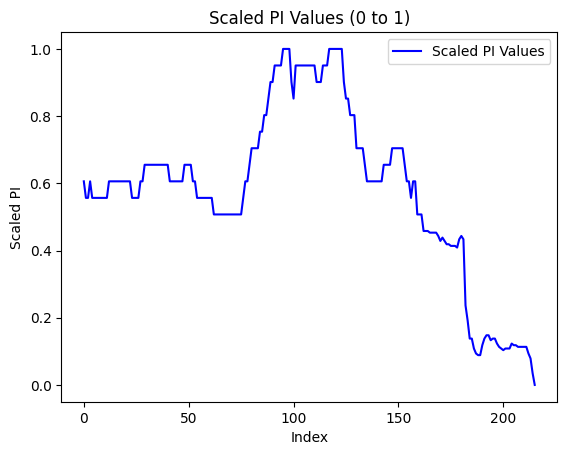

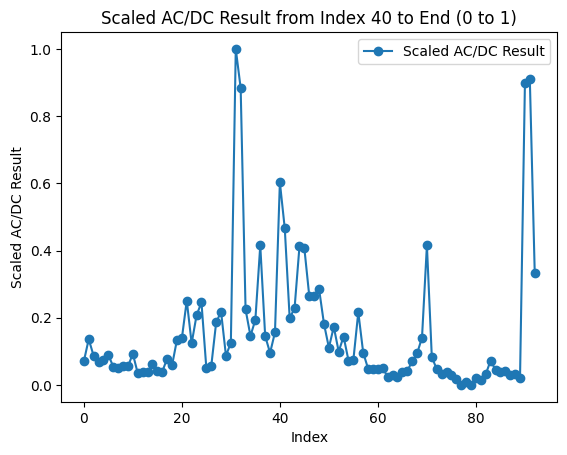

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming you have AC, TSI, and PI data in separate columns in a DataFrame
# Replace 'alignedData.xlsx' with the actual file or data source
df = pd.read_csv('https://raw.githubusercontent.com/smomtahe/ai/main/AC.csv')

# Extract PI values from the DataFrame
pi_values = df['PI'][80:]

# Normalize PI values to the range of 0 to 1
pi_scaler = MinMaxScaler()
pi_values_scaled = pi_scaler.fit_transform(pi_values.values.reshape(-1, 1))

# Plot scaled PI values
plt.plot(pi_values_scaled, label='Scaled PI Values', color='blue')
plt.title('Scaled PI Values (0 to 1)')
plt.xlabel('Index')
plt.ylabel('Scaled PI')
plt.legend()
plt.show()


# Assuming ac_dc_result is the list containing your AC/DC results

# Normalize AC/DC results to the range of 0 to 1
ac_dc_scaler = MinMaxScaler()
ac_dc_result_scaled = ac_dc_scaler.fit_transform(np.array(ac_dc_result[40:]).reshape(-1, 1))

# Plot scaled AC/DC results
plt.figure()
plt.plot(ac_dc_result_scaled, label='Scaled AC/DC Result', marker='o')
plt.title('Scaled AC/DC Result from Index 40 to End (0 to 1)')
plt.xlabel('Index')
plt.ylabel('Scaled AC/DC Result')
plt.legend()

plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Assuming you have AC, TSI, and PI data in separate columns in a DataFrame
# Replace 'your_data.csv' with the actual file or data source
df = pd.read_csv('https://raw.githubusercontent.com/smomtahe/ai/main/AC.csv')

# Assuming AC, TSI, and PI columns are named 'AC', 'TSI', and 'PI' respectively
ac_values = df['AC']
# Read 'ac_values.csv' into a pandas DataFrame
ac_values_df = pd.read_csv('ac_values.csv')

# Assuming the 'ac_values' column is present in the DataFrame
ac_values = ac_values_df['ac_values']

tsi_values = df['TSI']
pi_values = df['PI']
len(pi_values )
# Number of values to keep (e.g., 296)
target_length = 296

# Adjust the length of AC by averaging
ac_averaged = ac_values.groupby(np.arange(len(ac_values)) // (len(ac_values) / target_length)).mean()

# Adjust lengths of TSI and PI
tsi_trimmed = tsi_values[:target_length]
pi_trimmed = pi_values[:target_length]

# Create a new DataFrame with the adjusted AC, TSI, and PI values
aligned_df = pd.DataFrame({'AC': ac_averaged, 'TSI': tsi_trimmed, 'PI': pi_trimmed})

# Save the new DataFrame to an Excel file
aligned_df.to_excel('alignedData.xlsx', index=False)


In [ ]:
# Protocol C

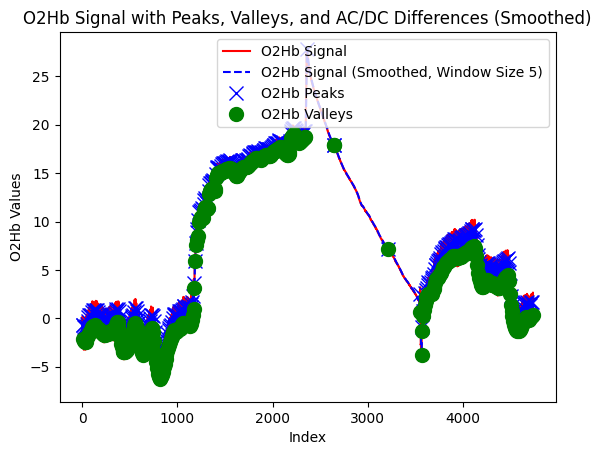

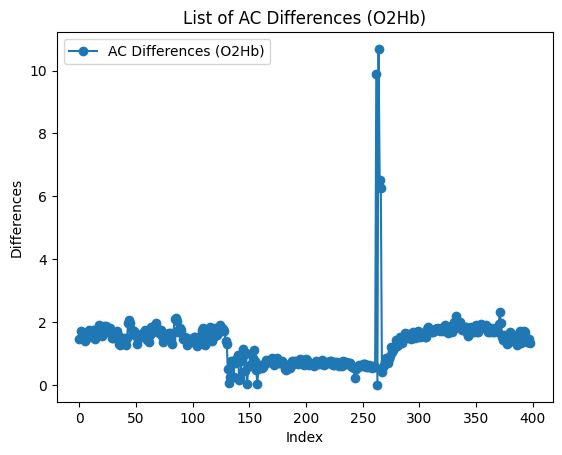

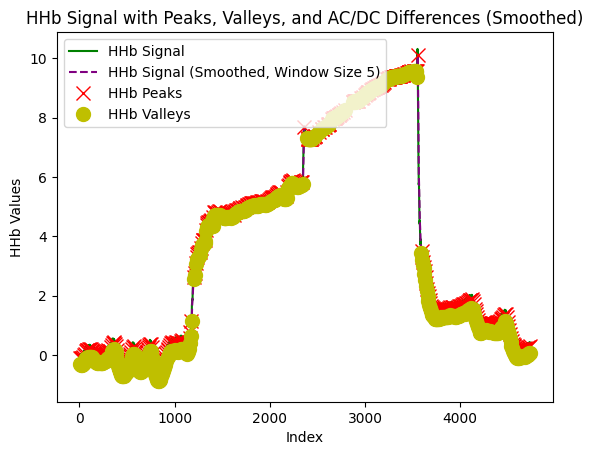

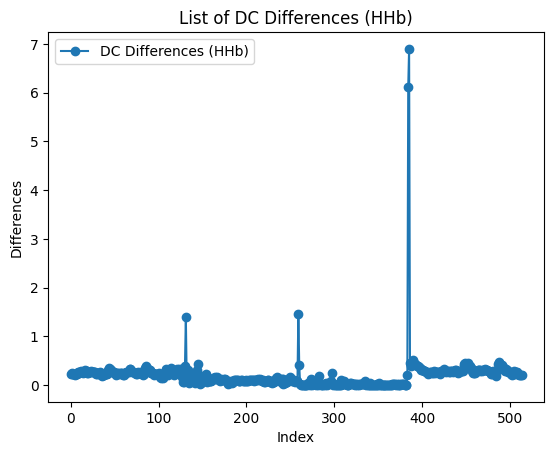

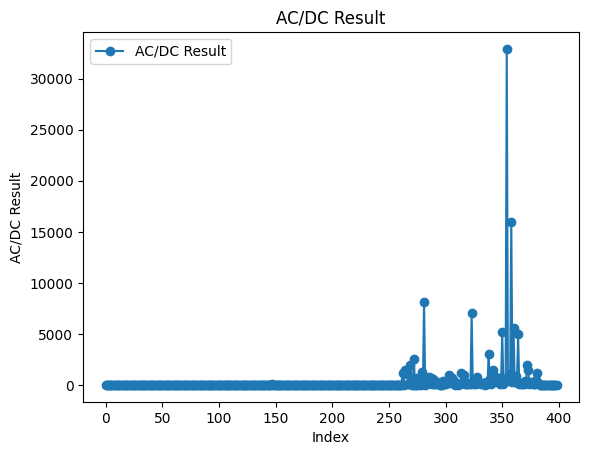

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/smomtahe/ai/main/dataFilterN.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Extract the "O2Hb1" and "HHb1" columns
o2hb_column = df['O2Hb1']
hhb_column = df['HHB1']

# Apply a moving average filter to smooth the O2Hb signal
window_size = 5  # Adjust the window size as needed
o2hb_smoothed = o2hb_column.rolling(window=window_size).mean()

# Apply a moving average filter to smooth the HHb signal
hhb_smoothed = hhb_column.rolling(window=window_size).mean()

# Find peaks on the smoothed O2Hb signal
peaks_o2hb_smoothed = [i for i in range(1, len(o2hb_smoothed)-1) if o2hb_smoothed.iloc[i] > o2hb_smoothed.iloc[i-1] and o2hb_smoothed.iloc[i] > o2hb_smoothed.iloc[i+1]]

# Find valleys on the smoothed O2Hb signal
valleys_o2hb_smoothed = [i for i in range(1, len(o2hb_smoothed)-1) if o2hb_smoothed.iloc[i] < o2hb_smoothed.iloc[i-1] and o2hb_smoothed.iloc[i] < o2hb_smoothed.iloc[i+1]]

# Find peaks on the smoothed HHb signal
peaks_hhb_smoothed = [i for i in range(1, len(hhb_smoothed)-1) if hhb_smoothed.iloc[i] > hhb_smoothed.iloc[i-1] and hhb_smoothed.iloc[i] > hhb_smoothed.iloc[i+1]]

# Find valleys on the smoothed HHb signal
valleys_hhb_smoothed = [i for i in range(1, len(hhb_smoothed)-1) if hhb_smoothed.iloc[i] < hhb_smoothed.iloc[i-1] and hhb_smoothed.iloc[i] < hhb_smoothed.iloc[i+1]]

# Calculate AC (O2Hb) and DC (HHb) differences
ac_differences = [abs(o2hb_smoothed.iloc[peak] - o2hb_smoothed.iloc[valley]) for peak, valley in zip(peaks_o2hb_smoothed, valleys_o2hb_smoothed)]
dc_differences = [abs(hhb_smoothed.iloc[peak] - hhb_smoothed.iloc[valley]) for peak, valley in zip(peaks_hhb_smoothed, valleys_hhb_smoothed)]

# Calculate AC/DC result
ac_dc_result = [ac / (dc + 1e-10) for ac, dc in zip(ac_differences, dc_differences)]  # Avoid division by zero

# Plot the original and smoothed O2Hb signals with detected peaks and valleys
plt.plot(o2hb_column, label='O2Hb Signal', color='red')
plt.plot(o2hb_smoothed, label=f'O2Hb Signal (Smoothed, Window Size {window_size})', linestyle='--', color='blue')
plt.plot(peaks_o2hb_smoothed, o2hb_smoothed.iloc[peaks_o2hb_smoothed], 'bx', label='O2Hb Peaks', markersize=10)
plt.plot(valleys_o2hb_smoothed, o2hb_smoothed.iloc[valleys_o2hb_smoothed], 'go', label='O2Hb Valleys', markersize=10)
plt.title('O2Hb Signal with Peaks, Valleys, and AC/DC Differences (Smoothed)')
plt.xlabel('Index')
plt.ylabel('O2Hb Values')
plt.legend()

# Plot the list of AC (O2Hb) differences
plt.figure()
plt.plot(ac_differences, label='AC Differences (O2Hb)', marker='o')
plt.title('List of AC Differences (O2Hb)')
plt.xlabel('Index')
plt.ylabel('Differences')
plt.legend()

# Plot the original and smoothed HHb signals with detected peaks and valleys
plt.figure()
plt.plot(hhb_column, label='HHb Signal', color='green')
plt.plot(hhb_smoothed, label=f'HHb Signal (Smoothed, Window Size {window_size})', linestyle='--', color='purple')
plt.plot(peaks_hhb_smoothed, hhb_smoothed.iloc[peaks_hhb_smoothed], 'rx', label='HHb Peaks', markersize=10)
plt.plot(valleys_hhb_smoothed, hhb_smoothed.iloc[valleys_hhb_smoothed], 'yo', label='HHb Valleys', markersize=10)
plt.title('HHb Signal with Peaks, Valleys, and AC/DC Differences (Smoothed)')
plt.xlabel('Index')
plt.ylabel('HHb Values')
plt.legend()

# Plot the list of DC (HHb) differences
plt.figure()
plt.plot(dc_differences, label='DC Differences (HHb)', marker='o')
plt.title('List of DC Differences (HHb)')
plt.xlabel('Index')
plt.ylabel('Differences')
plt.legend()

# Plot the AC/DC result
plt.figure()
plt.plot(ac_dc_result, label='AC/DC Result', marker='o')
plt.title('AC/DC Result')
plt.xlabel('Index')
plt.ylabel('AC/DC Result')
plt.legend()

plt.show()


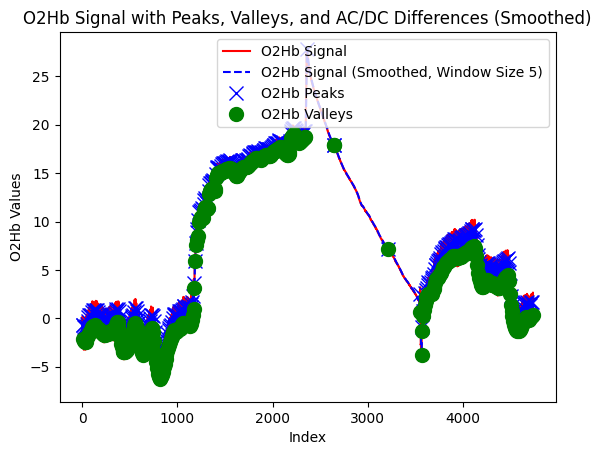

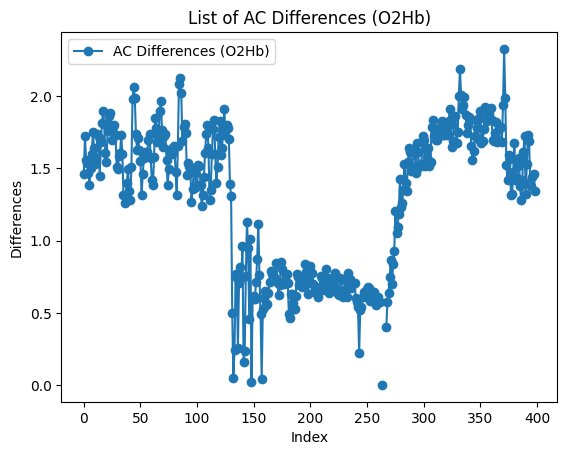

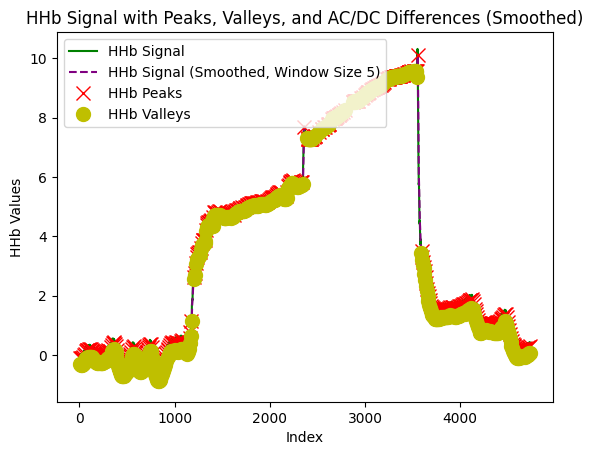

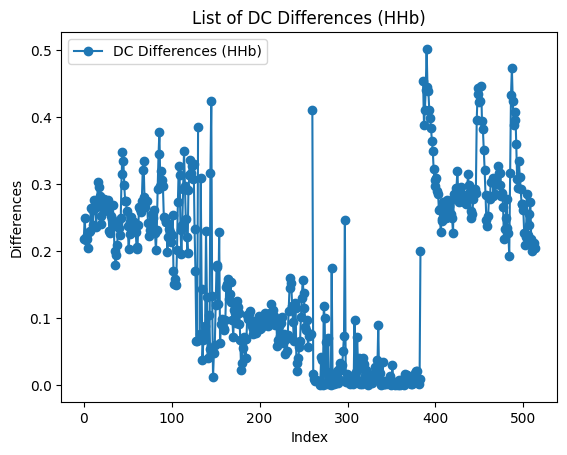

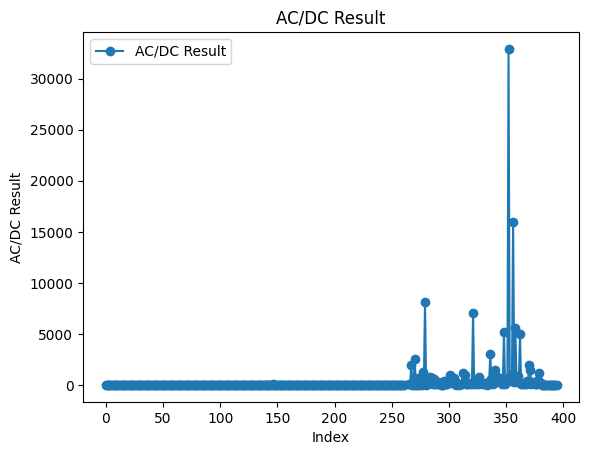

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/smomtahe/ai/main/dataFilterN.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Extract the "O2Hb1" and "HHb1" columns
o2hb_column = df['O2Hb1']
hhb_column = df['HHB1']

# Apply a moving average filter to smooth the O2Hb signal
window_size = 5  # Adjust the window size as needed
o2hb_smoothed = o2hb_column.rolling(window=window_size).mean()

# Apply a moving average filter to smooth the HHb signal
hhb_smoothed = hhb_column.rolling(window=window_size).mean()

# Find peaks on the smoothed O2Hb signal
peaks_o2hb_smoothed = [i for i in range(1, len(o2hb_smoothed)-1) if o2hb_smoothed.iloc[i] > o2hb_smoothed.iloc[i-1] and o2hb_smoothed.iloc[i] > o2hb_smoothed.iloc[i+1]]

# Find valleys on the smoothed O2Hb signal
valleys_o2hb_smoothed = [i for i in range(1, len(o2hb_smoothed)-1) if o2hb_smoothed.iloc[i] < o2hb_smoothed.iloc[i-1] and o2hb_smoothed.iloc[i] < o2hb_smoothed.iloc[i+1]]

# Find peaks on the smoothed HHb signal
peaks_hhb_smoothed = [i for i in range(1, len(hhb_smoothed)-1) if hhb_smoothed.iloc[i] > hhb_smoothed.iloc[i-1] and hhb_smoothed.iloc[i] > hhb_smoothed.iloc[i+1]]

# Find valleys on the smoothed HHb signal
valleys_hhb_smoothed = [i for i in range(1, len(hhb_smoothed)-1) if hhb_smoothed.iloc[i] < hhb_smoothed.iloc[i-1] and hhb_smoothed.iloc[i] < hhb_smoothed.iloc[i+1]]

# Calculate AC (O2Hb) and DC (HHb) differences
ac_differences = [abs(o2hb_smoothed.iloc[peak] - o2hb_smoothed.iloc[valley]) for peak, valley in zip(peaks_o2hb_smoothed, valleys_o2hb_smoothed)]
dc_differences = [abs(hhb_smoothed.iloc[peak] - hhb_smoothed.iloc[valley]) for peak, valley in zip(peaks_hhb_smoothed, valleys_hhb_smoothed)]

# Filter out O2Hb differences greater than 3 and HHb differences greater than 1
ac_differences_filtered = [diff if diff <= 3 else np.nan for diff in ac_differences]
dc_differences_filtered = [diff if diff <= 1 else np.nan for diff in dc_differences]

# Calculate AC/DC result
ac_dc_result = [ac / (dc + 1e-10) for ac, dc in zip(ac_differences_filtered, dc_differences_filtered) if not np.isnan(dc)]

# Plot the original and smoothed O2Hb signals with detected peaks and valleys
plt.plot(o2hb_column, label='O2Hb Signal', color='red')
plt.plot(o2hb_smoothed, label=f'O2Hb Signal (Smoothed, Window Size {window_size})', linestyle='--', color='blue')
plt.plot(peaks_o2hb_smoothed, o2hb_smoothed.iloc[peaks_o2hb_smoothed], 'bx', label='O2Hb Peaks', markersize=10)
plt.plot(valleys_o2hb_smoothed, o2hb_smoothed.iloc[valleys_o2hb_smoothed], 'go', label='O2Hb Valleys', markersize=10)
plt.title('O2Hb Signal with Peaks, Valleys, and AC/DC Differences (Smoothed)')
plt.xlabel('Index')
plt.ylabel('O2Hb Values')
plt.legend()

# Plot the list of AC (O2Hb) differences
plt.figure()
plt.plot(ac_differences_filtered, label='AC Differences (O2Hb)', marker='o')
plt.title('List of AC Differences (O2Hb)')
plt.xlabel('Index')
plt.ylabel('Differences')
plt.legend()

# Plot the original and smoothed HHb signals with detected peaks and valleys
plt.figure()
plt.plot(hhb_column, label='HHb Signal', color='green')
plt.plot(hhb_smoothed, label=f'HHb Signal (Smoothed, Window Size {window_size})', linestyle='--', color='purple')
plt.plot(peaks_hhb_smoothed, hhb_smoothed.iloc[peaks_hhb_smoothed], 'rx', label='HHb Peaks', markersize=10)
plt.plot(valleys_hhb_smoothed, hhb_smoothed.iloc[valleys_hhb_smoothed], 'yo', label='HHb Valleys', markersize=10)
plt.title('HHb Signal with Peaks, Valleys, and AC/DC Differences (Smoothed)')
plt.xlabel('Index')
plt.ylabel('HHb Values')
plt.legend()

# Plot the list of DC (HHb) differences
plt.figure()
plt.plot(dc_differences_filtered, label='DC Differences (HHb)', marker='o')
plt.title('List of DC Differences (HHb)')
plt.xlabel('Index')
plt.ylabel('Differences')
plt.legend()

# Plot the AC/DC result
plt.figure()
plt.plot(ac_dc_result, label='AC/DC Result', marker='o')
plt.title('AC/DC Result')
plt.xlabel('Index')
plt.ylabel('AC/DC Result')
plt.legend()

plt.show()


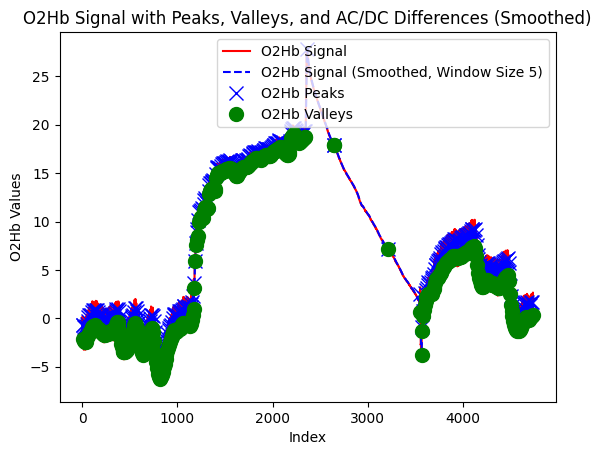

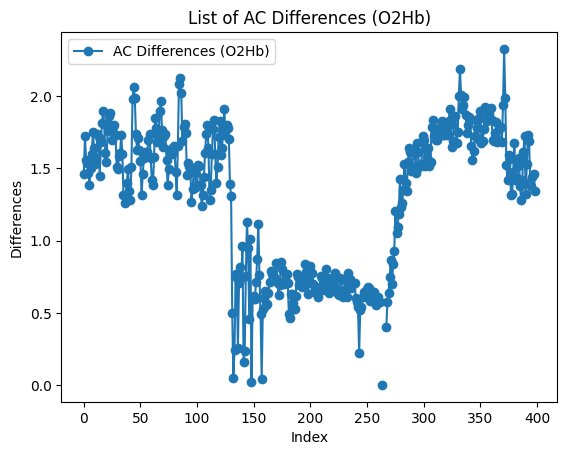

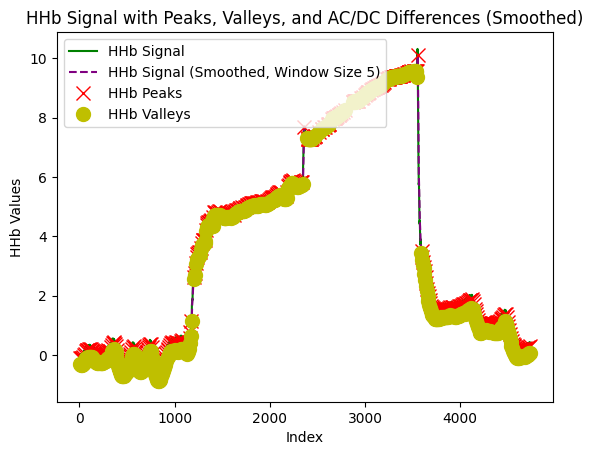

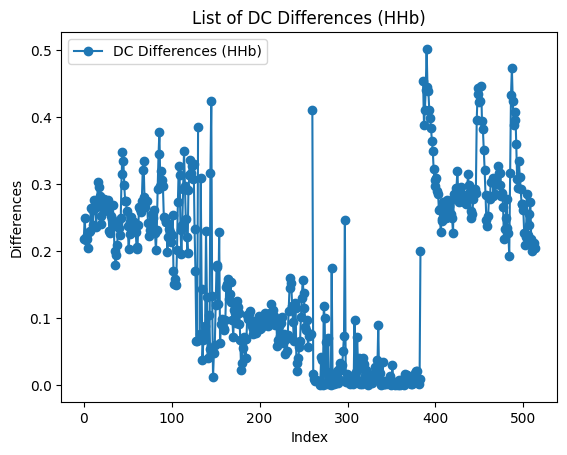

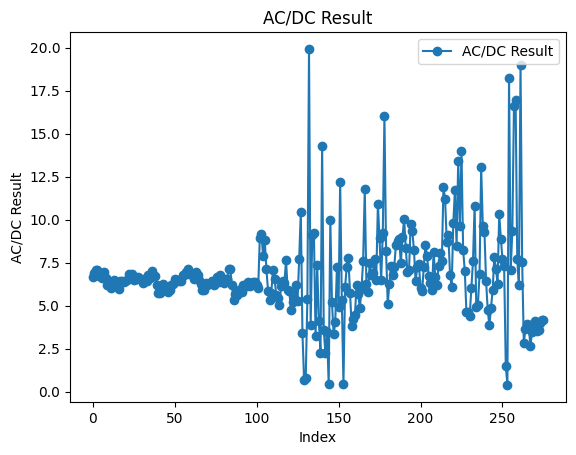

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/smomtahe/ai/main/dataFilterN.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Extract the "O2Hb1" and "HHb1" columns
o2hb_column = df['O2Hb1']
hhb_column = df['HHB1']

# Apply a moving average filter to smooth the O2Hb signal
window_size = 5  # Adjust the window size as needed
o2hb_smoothed = o2hb_column.rolling(window=window_size).mean()

# Apply a moving average filter to smooth the HHb signal
hhb_smoothed = hhb_column.rolling(window=window_size).mean()

# Find peaks on the smoothed O2Hb signal
peaks_o2hb_smoothed = [i for i in range(1, len(o2hb_smoothed)-1) if o2hb_smoothed.iloc[i] > o2hb_smoothed.iloc[i-1] and o2hb_smoothed.iloc[i] > o2hb_smoothed.iloc[i+1]]

# Find valleys on the smoothed O2Hb signal
valleys_o2hb_smoothed = [i for i in range(1, len(o2hb_smoothed)-1) if o2hb_smoothed.iloc[i] < o2hb_smoothed.iloc[i-1] and o2hb_smoothed.iloc[i] < o2hb_smoothed.iloc[i+1]]

# Find peaks on the smoothed HHb signal
peaks_hhb_smoothed = [i for i in range(1, len(hhb_smoothed)-1) if hhb_smoothed.iloc[i] > hhb_smoothed.iloc[i-1] and hhb_smoothed.iloc[i] > hhb_smoothed.iloc[i+1]]

# Find valleys on the smoothed HHb signal
valleys_hhb_smoothed = [i for i in range(1, len(hhb_smoothed)-1) if hhb_smoothed.iloc[i] < hhb_smoothed.iloc[i-1] and hhb_smoothed.iloc[i] < hhb_smoothed.iloc[i+1]]

# Calculate AC (O2Hb) and DC (HHb) differences
ac_differences = [abs(o2hb_smoothed.iloc[peak] - o2hb_smoothed.iloc[valley]) for peak, valley in zip(peaks_o2hb_smoothed, valleys_o2hb_smoothed)]
dc_differences = [abs(hhb_smoothed.iloc[peak] - hhb_smoothed.iloc[valley]) for peak, valley in zip(peaks_hhb_smoothed, valleys_hhb_smoothed)]

# Filter out O2Hb differences greater than 3 and HHb differences greater than 1
ac_differences_filtered = [diff if diff <= 3 else np.nan for diff in ac_differences]
dc_differences_filtered = [diff if diff <= 1 else np.nan for diff in dc_differences]

# Calculate AC/DC result
ac_dc_result = [ac / (dc + 1e-10) for ac, dc in zip(ac_differences_filtered, dc_differences_filtered) if not np.isnan(dc) and ac / (dc + 1e-10) <= 20]  # Exclude values above 5000

# Plot the original and smoothed O2Hb signals with detected peaks and valleys
plt.plot(o2hb_column, label='O2Hb Signal', color='red')
plt.plot(o2hb_smoothed, label=f'O2Hb Signal (Smoothed, Window Size {window_size})', linestyle='--', color='blue')
plt.plot(peaks_o2hb_smoothed, o2hb_smoothed.iloc[peaks_o2hb_smoothed], 'bx', label='O2Hb Peaks', markersize=10)
plt.plot(valleys_o2hb_smoothed, o2hb_smoothed.iloc[valleys_o2hb_smoothed], 'go', label='O2Hb Valleys', markersize=10)
plt.title('O2Hb Signal with Peaks, Valleys, and AC/DC Differences (Smoothed)')
plt.xlabel('Index')
plt.ylabel('O2Hb Values')
plt.legend()

# Plot the list of AC (O2Hb) differences
plt.figure()
plt.plot(ac_differences_filtered, label='AC Differences (O2Hb)', marker='o')
plt.title('List of AC Differences (O2Hb)')
plt.xlabel('Index')
plt.ylabel('Differences')
plt.legend()

# Plot the original and smoothed HHb signals with detected peaks and valleys
plt.figure()
plt.plot(hhb_column, label='HHb Signal', color='green')
plt.plot(hhb_smoothed, label=f'HHb Signal (Smoothed, Window Size {window_size})', linestyle='--', color='purple')
plt.plot(peaks_hhb_smoothed, hhb_smoothed.iloc[peaks_hhb_smoothed], 'rx', label='HHb Peaks', markersize=10)
plt.plot(valleys_hhb_smoothed, hhb_smoothed.iloc[valleys_hhb_smoothed], 'yo', label='HHb Valleys', markersize=10)
plt.title('HHb Signal with Peaks, Valleys, and AC/DC Differences (Smoothed)')
plt.xlabel('Index')
plt.ylabel('HHb Values')
plt.legend()

# Plot the list of DC (HHb) differences
plt.figure()
plt.plot(dc_differences_filtered, label='DC Differences (HHb)', marker='o')
plt.title('List of DC Differences (HHb)')
plt.xlabel('Index')
plt.ylabel('Differences')
plt.legend()

# Plot the AC/DC result
plt.figure()
plt.plot(ac_dc_result, label='AC/DC Result', marker='o')
plt.title('AC/DC Result')
plt.xlabel('Index')
plt.ylabel('AC/DC Result')
plt.legend()

plt.show()


475


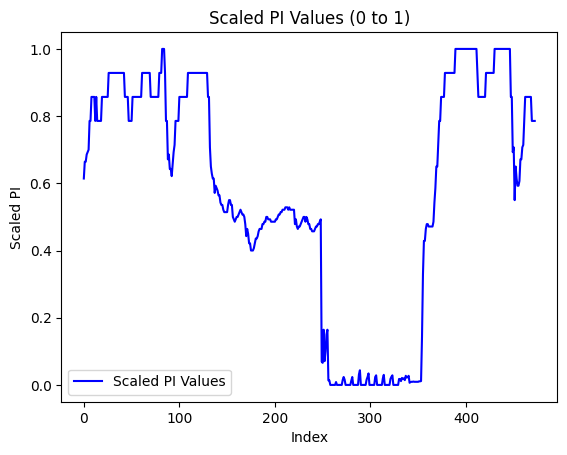

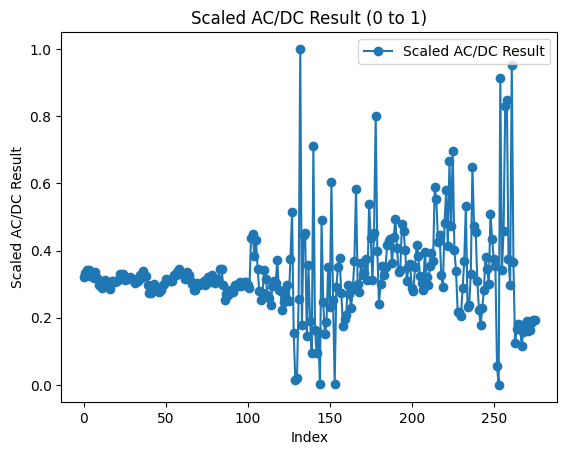

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming you have AC, TSI, and PI data in separate columns in a DataFrame
# Replace 'alignedData.xlsx' with the actual file or data source
df = pd.read_csv('https://raw.githubusercontent.com/smomtahe/ai/main/dataFilter.csv')

# Extract PI values from the DataFrame
pi_values = df['PI1']
print(len(pi_values))
# Normalize PI values to the range of 0 to 1
pi_scaler = MinMaxScaler()
pi_values_scaled = pi_scaler.fit_transform(pi_values.values.reshape(-1, 1))

# Plot scaled PI values
plt.plot(pi_values_scaled, label='Scaled PI Values', color='blue')
plt.title('Scaled PI Values (0 to 1)')
plt.xlabel('Index')
plt.ylabel('Scaled PI')
plt.legend()
plt.show()


# Assuming ac_dc_result is the list containing your AC/DC results

# Normalize AC/DC results to the range of 0 to 1
ac_dc_scaler = MinMaxScaler()
ac_dc_result_scaled = ac_dc_scaler.fit_transform(np.array(ac_dc_result).reshape(-1, 1))

# Plot scaled AC/DC results
plt.figure()
plt.plot(ac_dc_result_scaled, label='Scaled AC/DC Result', marker='o')
plt.title('Scaled AC/DC Result (0 to 1)')
plt.xlabel('Index')
plt.ylabel('Scaled AC/DC Result')
plt.legend()

plt.show()


In [ ]:
print(len(dc_differences_filtered))
print(len(ac_differences_filtered))

514
399


475
Accuracy: 0.9780361267318171
Mean Squared Error (MSE): 0.0026457301020138607
Actual vs Predicted Targets:
      target  Predicted_PI
5   0.700000      0.916429
6   0.785714      0.821357
7   0.785714      0.833571
8   0.857143      0.505929
9   0.857143      0.927857
10  0.857143      0.869286
11  0.857143      0.550500
12  0.785714      0.876429
13  0.857143      0.857857
14  0.785714      0.728786
15  0.785714      0.793929
16  0.785714      0.684429
17  0.785714      0.004414
18  0.785714      0.475714
19  0.857143      0.904357
20  0.857143      0.863786
21  0.857143      0.876000
22  0.857143      0.962857
23  0.857143      0.460571
24  0.857143      0.727857
25  0.857143      0.977143


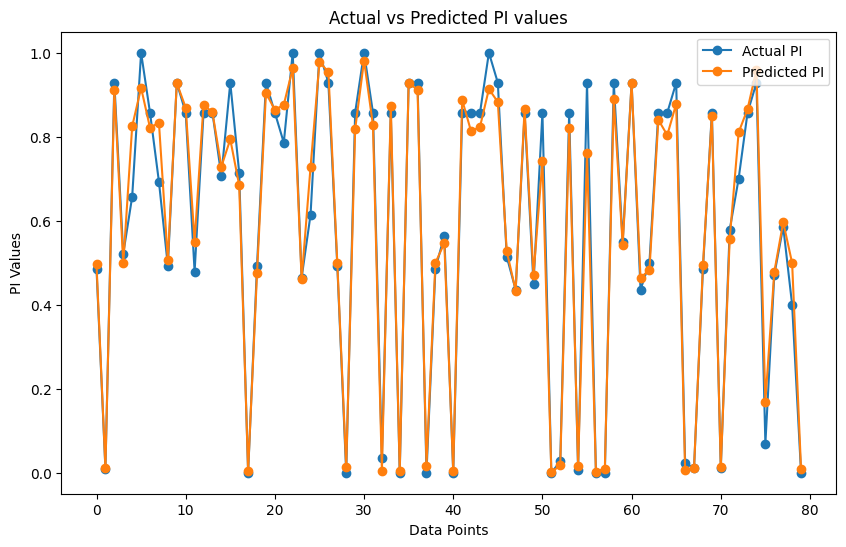

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Assuming you have AC, TSI, and PI data in separate columns in a DataFrame
# Replace 'your_data.csv' with the actual file or data source
df = pd.read_csv('https://raw.githubusercontent.com/smomtahe/ai/main/dataFilter.csv')

# Assuming AC, TSI, and PI columns are named 'AC', 'TSI', and 'PI' respectively
ac_values = ac_differences_filtered
dc_values = dc_differences_filtered
pi_values = df['PI1']
tsi_values = df['TSI1']
print(len(pi_values))
# Number of values to keep (e.g., 399)
target_length = 399

# Adjust lengths of TSI and PI
pi_trimmed = pi_values[:target_length]
tsi_trimmed = tsi_values[:target_length]
dc_differences_filtered = dc_differences_filtered[:target_length]

# Create a DataFrame with the adjusted data
aligned_df = pd.DataFrame({'ac_differences_filtered': ac_values,
                           'dc_differences_filtered': dc_differences_filtered,
                           'tsi_trimmed': tsi_trimmed,
                           'target': pi_trimmed})

# Split the data into features and target
features = aligned_df[['ac_differences_filtered', 'dc_differences_filtered', 'tsi_trimmed']]
target = aligned_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create an imputer to handle missing values (replace NaN with mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data as well
X_test_imputed = imputer.transform(X_test)

# Create a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model with imputed data
rf_model.fit(X_train_imputed, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test_imputed)

# Display the actual target (PI) and the predicted target (pi) side by side
results = pd.DataFrame({'Actual PI': y_test, 'Predicted PI': predictions})

# Calculate accuracy (you can use different metrics based on your requirements)
accuracy = r2_score(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)

# Print the accuracy
print(f"Accuracy: {accuracy}")
print(f"Mean Squared Error (MSE): {MSE}")

# Show actual and predicted targets for rows 5 to 25
print("Actual vs Predicted Targets:")
print(aligned_df.iloc[5:26][['target']].assign(Predicted_PI=predictions[5:26]))


import matplotlib.pyplot as plt

# Plotting the actual and predicted PI values
plt.figure(figsize=(10, 6))

# Plotting actual PI values
plt.plot(y_test.values, label='Actual PI', marker='o')

# Plotting predicted PI values
plt.plot(predictions, label='Predicted PI', marker='o')

# Adding labels and title
plt.xlabel('Data Points')
plt.ylabel('PI Values')
plt.title('Actual vs Predicted PI values')
plt.legend()

# Display the plot
plt.show()




475
Accuracy: -0.21532112932559233
Mean Squared Error (MSE): 0.14639547661787272
Actual vs Predicted Targets:
      target  Predicted_PI
5   0.700000      0.840079
6   0.785714      0.651531
7   0.785714      0.848729
8   0.857143      0.486714
9   0.857143      0.826300
10  0.857143      0.668571
11  0.857143      0.612679
12  0.785714      0.229836
13  0.857143      0.787857
14  0.785714      0.402357
15  0.785714      0.355700
16  0.785714      0.287979
17  0.785714      0.024457
18  0.785714      0.078000
19  0.857143      0.876429
20  0.857143      0.105000
21  0.857143      0.567571
22  0.857143      0.876429
23  0.857143      0.476643
24  0.857143      0.796929
25  0.857143      0.914286


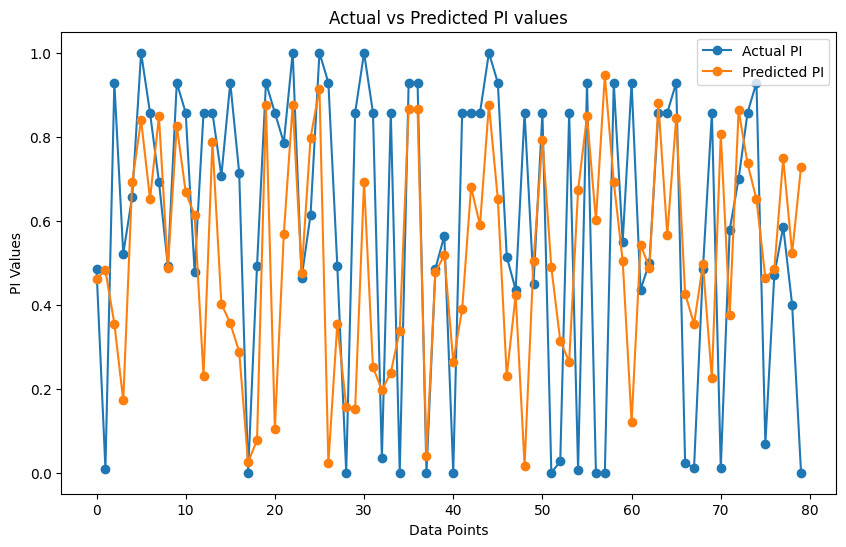

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Assuming you have AC, TSI, and PI data in separate columns in a DataFrame
# Replace 'your_data.csv' with the actual file or data source
df = pd.read_csv('https://raw.githubusercontent.com/smomtahe/ai/main/dataFilter.csv')

# Assuming AC, TSI, and PI columns are named 'AC', 'TSI', and 'PI' respectively
ac_values = ac_differences_filtered
dc_values = dc_differences_filtered
pi_values = df['PI1']
tsi_values = df['TSI1']

print(len(pi_values))
# Number of values to keep (e.g., 399)
target_length = 399

# Adjust lengths of TSI and PI
pi_trimmed = pi_values[:target_length]
tsi_trimmed = tsi_values[:target_length]
dc_differences_filtered = dc_differences_filtered[:target_length]
actsi=ac_values*tsi_trimmed

# Create a DataFrame with the adjusted data
aligned_df = pd.DataFrame({'ac_differences_filtered': ac_values,
                           'dc_differences_filtered': dc_differences_filtered,
                           'tsi_trimmed': tsi_trimmed,'actsi': actsi,
                           'target': pi_trimmed})

# Split the data into features and target
features = aligned_df[['ac_differences_filtered']]
target = aligned_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create an imputer to handle missing values (replace NaN with mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data as well
X_test_imputed = imputer.transform(X_test)

# Create a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model with imputed data
rf_model.fit(X_train_imputed, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test_imputed)

# Display the actual target (PI) and the predicted target (pi) side by side
results = pd.DataFrame({'Actual PI': y_test, 'Predicted PI': predictions})

# Calculate accuracy (you can use different metrics based on your requirements)
accuracy = r2_score(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)

# Print the accuracy
print(f"Accuracy: {accuracy}")
print(f"Mean Squared Error (MSE): {MSE}")

# Show actual and predicted targets for rows 5 to 25
print("Actual vs Predicted Targets:")
print(aligned_df.iloc[5:26][['target']].assign(Predicted_PI=predictions[5:26]))


import matplotlib.pyplot as plt

# Plotting the actual and predicted PI values
plt.figure(figsize=(10, 6))

# Plotting actual PI values
plt.plot(y_test.values, label='Actual PI', marker='o')

# Plotting predicted PI values
plt.plot(predictions, label='Predicted PI', marker='o')

# Adding labels and title
plt.xlabel('Data Points')
plt.ylabel('PI Values')
plt.title('Actual vs Predicted PI values')
plt.legend()

# Display the plot
plt.show()




Accuracy (All Data): 0.9930919126065764
Mean Squared Error (MSE) (All Data): 0.0008351749358495167
Actual vs Predicted Targets:
      target  Predicted_PI
5   0.700000      0.810357
6   0.785714      0.798643
7   0.785714      0.788857
8   0.857143      0.848571
9   0.857143      0.869286
10  0.857143      0.846429
11  0.857143      0.859786
12  0.785714      0.813286
13  0.857143      0.862857
14  0.785714      0.808500
15  0.785714      0.876000
16  0.785714      0.770143
17  0.785714      0.816714
18  0.785714      0.797429
19  0.857143      0.855500
20  0.857143      0.851714
21  0.857143      0.852143
22  0.857143      0.866429
23  0.857143      0.862857
24  0.857143      0.858571
25  0.857143      0.823571


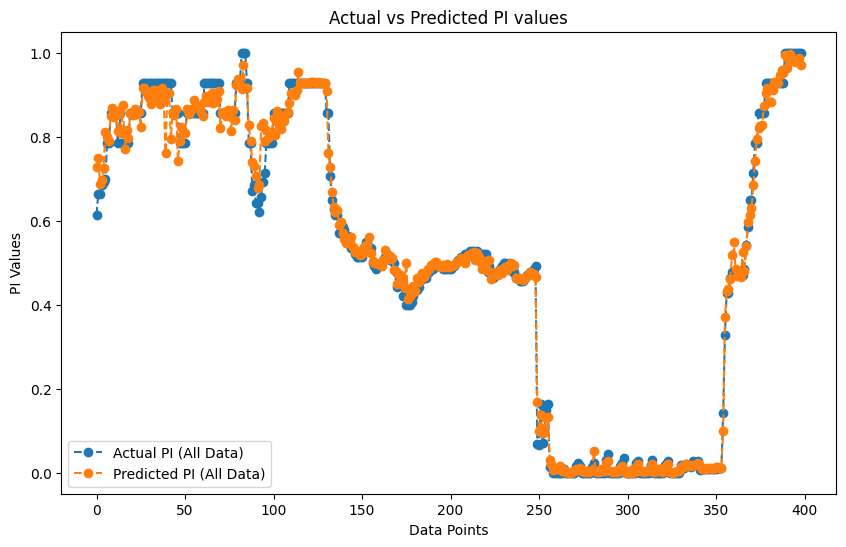

In [ ]:
#RF above for all data (including TSI)
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Assuming you have AC, TSI, and PI data in separate columns in a DataFrame
# Replace 'your_data.csv' with the actual file or data source
df = pd.read_csv('https://raw.githubusercontent.com/smomtahe/ai/main/dataFilter.csv')

# Assuming AC, TSI, and PI columns are named 'AC', 'TSI', and 'PI' respectively
ac_values = ac_differences_filtered
dc_values = dc_differences_filtered
pi_values = df['PI1']
tsi_values = df['TSI1']

# Number of values to keep (e.g., 399)
target_length = 399

# Adjust lengths of TSI and PI
pi_trimmed = pi_values[:target_length]
tsi_trimmed = tsi_values[:target_length]
dc_differences_filtered = dc_differences_filtered[:target_length]

# Create a DataFrame with the adjusted data
aligned_df = pd.DataFrame({'ac_differences_filtered': ac_values,
                           'dc_differences_filtered': dc_differences_filtered,
                           'tsi_trimmed': tsi_trimmed,
                           'target': pi_trimmed})

# Split the data into features and target
features = aligned_df[['ac_differences_filtered', 'dc_differences_filtered', 'tsi_trimmed']]
target = aligned_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create an imputer to handle missing values (replace NaN with mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data as well
X_test_imputed = imputer.transform(X_test)

# Create a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model with imputed data
rf_model.fit(X_train_imputed, y_train)

# Transform the entire dataset as well
features_imputed = imputer.transform(features)

# Make predictions on the entire dataset
predictions_all = rf_model.predict(features_imputed)

# Make predictions on the test set
predictions_test = rf_model.predict(X_test_imputed)

# Display the actual target (PI) and the predicted target (pi) side by side
results = pd.DataFrame({'Actual PI': target, 'Predicted PI': predictions_all})

# Calculate accuracy (you can use different metrics based on your requirements)
accuracy_all = r2_score(target, predictions_all)
MSE_all = mean_squared_error(target, predictions_all)

# Print the accuracy for the entire dataset
print(f"Accuracy (All Data): {accuracy_all}")
print(f"Mean Squared Error (MSE) (All Data): {MSE_all}")

# Show actual and predicted targets for rows 5 to 25
print("Actual vs Predicted Targets:")
print(aligned_df.iloc[5:26][['target']].assign(Predicted_PI=predictions_all[5:26]))

# Plotting the actual and predicted PI values
plt.figure(figsize=(10, 6))

# Plotting actual PI values for all data
plt.plot(target.values, label='Actual PI (All Data)', marker='o', linestyle='--')

# Plotting predicted PI values for all data
plt.plot(predictions_all, label='Predicted PI (All Data)', marker='o', linestyle='--')



# Adding labels and title
plt.xlabel('Data Points')
plt.ylabel('PI Values')
plt.title('Actual vs Predicted PI values')
plt.legend()

# Display the plot
plt.show()


In [ ]:
#using NN - only test data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Assuming you have AC, TSI, and PI data in separate columns in a DataFrame
# Replace 'your_data.csv' with the actual file or data source
df = pd.read_csv('https://raw.githubusercontent.com/smomtahe/ai/main/dataFilter.csv')

# Assuming AC, TSI, and PI columns are named 'AC', 'TSI', and 'PI' respectively
ac_values = ac_differences_filtered
dc_values = dc_differences_filtered
pi_values = df['PI1']
tsi_values = df['TSI1']

# Number of values to keep (e.g., 399)
target_length = 399

# Adjust lengths of TSI and PI
pi_trimmed = pi_values[:target_length]
tsi_trimmed = tsi_values[:target_length]
dc_differences_filtered = dc_differences_filtered[:target_length]

# Create a DataFrame with the adjusted data
aligned_df = pd.DataFrame({'ac_differences_filtered': ac_values,
                           'dc_differences_filtered': dc_differences_filtered,
                           'tsi_trimmed': tsi_trimmed,
                           'target': pi_trimmed})

# Split the data into features and target
features = aligned_df[['ac_differences_filtered', 'dc_differences_filtered', 'tsi_trimmed']]
target = aligned_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create an imputer to handle missing values (replace NaN with mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data as well
X_test_imputed = imputer.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

# Make predictions on the test set
predictions = model.predict(X_test_scaled).flatten()

# Calculate accuracy (you can use different metrics based on your requirements)
accuracy = r2_score(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)

# Print the accuracy
print(f"Accuracy: {accuracy}")
print(f"Mean Squared Error (MSE): {MSE}")

# Show actual and predicted targets for rows 5 to 25
print("Actual vs Predicted Targets:")
print(aligned_df.iloc[5:26][['target']].assign(Predicted_PI=predictions[5:26]))


In [ ]:
##case 2

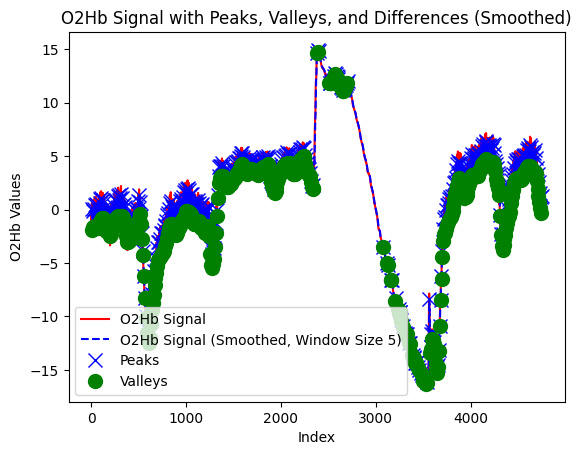

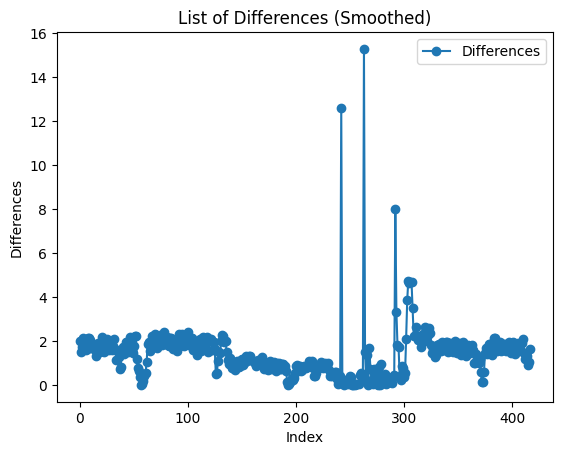

418


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/smomtahe/ai/main/dataFilterN.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Extract the "O2Hb1" column
o2hb_column = df['O2Hb2']

# Apply a moving average filter to smooth the signal
window_size = 5  # Adjust the window size as needed
o2hb_smoothed = o2hb_column.rolling(window=window_size).mean()

# Find peaks on the smoothed signal
peaks_smoothed = [i for i in range(1, len(o2hb_smoothed)-1) if o2hb_smoothed.iloc[i] > o2hb_smoothed.iloc[i-1] and o2hb_smoothed.iloc[i] > o2hb_smoothed.iloc[i+1]]

# Find valleys on the smoothed signal
valleys_smoothed = [i for i in range(1, len(o2hb_smoothed)-1) if o2hb_smoothed.iloc[i] < o2hb_smoothed.iloc[i-1] and o2hb_smoothed.iloc[i] < o2hb_smoothed.iloc[i+1]]

# Annotate with arrows showing the differences between peaks and valleys
differences = []
for peak, valley in zip(peaks_smoothed, valleys_smoothed):
    diff = abs(o2hb_smoothed.iloc[peak] - o2hb_smoothed.iloc[valley])
    differences.append(diff)

# Save differences (AC values) to a CSV file
ac_values_df = pd.DataFrame({'ac_values': differences})
ac_values_df.to_csv('ac_values.csv', index=False)

# Plot the original and smoothed signals with detected peaks and valleys
plt.plot(o2hb_column, label='O2Hb Signal', color='red')
plt.plot(o2hb_smoothed, label=f'O2Hb Signal (Smoothed, Window Size {window_size})', linestyle='--', color='blue')
plt.plot(peaks_smoothed, o2hb_smoothed.iloc[peaks_smoothed], 'bx', label='Peaks', markersize=10)
plt.plot(valleys_smoothed, o2hb_smoothed.iloc[valleys_smoothed], 'go', label='Valleys', markersize=10)
plt.title('O2Hb Signal with Peaks, Valleys, and Differences (Smoothed)')
plt.xlabel('Index')
plt.ylabel('O2Hb Values')
plt.legend()

# Plot the list of differences
plt.figure()
plt.plot(differences, label='Differences', marker='o')
plt.title('List of Differences (Smoothed)')
plt.xlabel('Index')
plt.ylabel('Differences')
plt.legend()
plt.show()

print(len(differences))

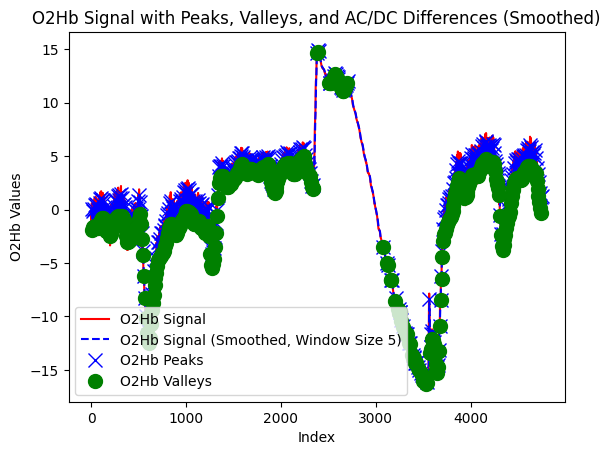

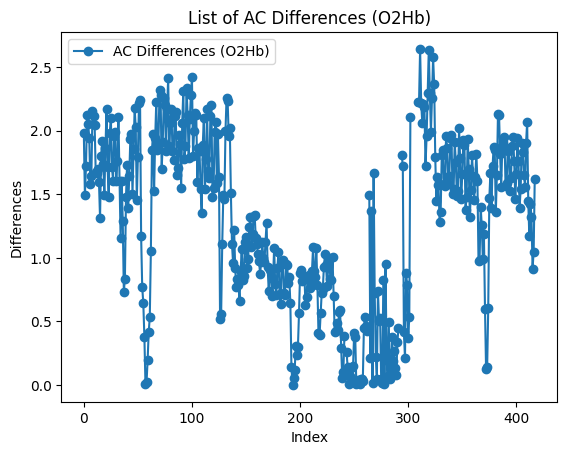

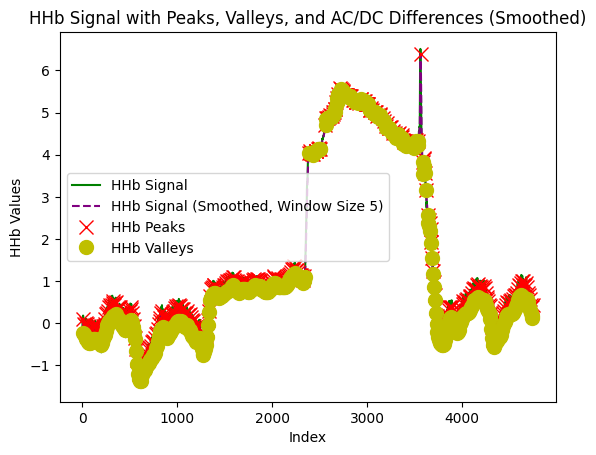

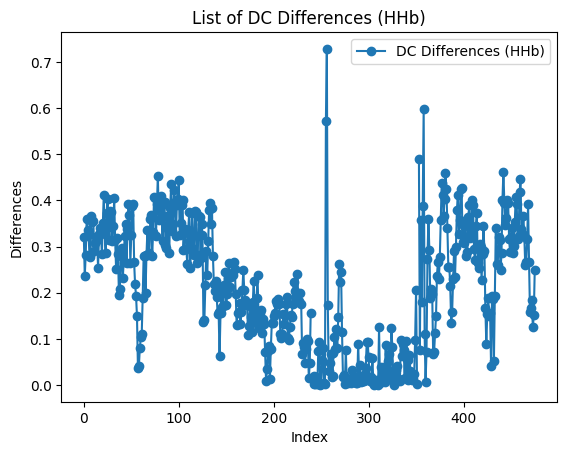

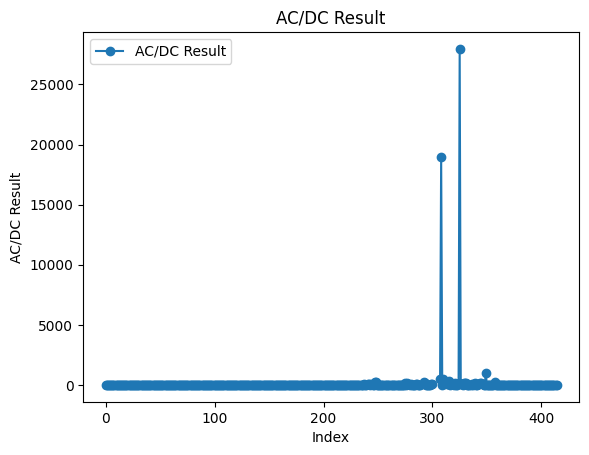

476

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/smomtahe/ai/main/dataFilterN.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Extract the "O2Hb1" and "HHb1" columns
o2hb_column = df['O2Hb2']
hhb_column = df['HHB2']

# Apply a moving average filter to smooth the O2Hb signal
window_size = 5  # Adjust the window size as needed
o2hb_smoothed = o2hb_column.rolling(window=window_size).mean()

# Apply a moving average filter to smooth the HHb signal
hhb_smoothed = hhb_column.rolling(window=window_size).mean()

# Find peaks on the smoothed O2Hb signal
peaks_o2hb_smoothed = [i for i in range(1, len(o2hb_smoothed)-1) if o2hb_smoothed.iloc[i] > o2hb_smoothed.iloc[i-1] and o2hb_smoothed.iloc[i] > o2hb_smoothed.iloc[i+1]]

# Find valleys on the smoothed O2Hb signal
valleys_o2hb_smoothed = [i for i in range(1, len(o2hb_smoothed)-1) if o2hb_smoothed.iloc[i] < o2hb_smoothed.iloc[i-1] and o2hb_smoothed.iloc[i] < o2hb_smoothed.iloc[i+1]]

# Find peaks on the smoothed HHb signal
peaks_hhb_smoothed = [i for i in range(1, len(hhb_smoothed)-1) if hhb_smoothed.iloc[i] > hhb_smoothed.iloc[i-1] and hhb_smoothed.iloc[i] > hhb_smoothed.iloc[i+1]]

# Find valleys on the smoothed HHb signal
valleys_hhb_smoothed = [i for i in range(1, len(hhb_smoothed)-1) if hhb_smoothed.iloc[i] < hhb_smoothed.iloc[i-1] and hhb_smoothed.iloc[i] < hhb_smoothed.iloc[i+1]]

# Calculate AC (O2Hb) and DC (HHb) differences
ac_differences = [abs(o2hb_smoothed.iloc[peak] - o2hb_smoothed.iloc[valley]) for peak, valley in zip(peaks_o2hb_smoothed, valleys_o2hb_smoothed)]
dc_differences = [abs(hhb_smoothed.iloc[peak] - hhb_smoothed.iloc[valley]) for peak, valley in zip(peaks_hhb_smoothed, valleys_hhb_smoothed)]

# Filter out O2Hb differences greater than 3 and HHb differences greater than 1
ac_differences_filtered = [diff if diff <= 3 else np.nan for diff in ac_differences]
dc_differences_filtered = [diff if diff <= 1 else np.nan for diff in dc_differences]

# Calculate AC/DC result
ac_dc_result = [ac / (dc + 1e-10) for ac, dc in zip(ac_differences_filtered, dc_differences_filtered) if not np.isnan(dc)]

# Plot the original and smoothed O2Hb signals with detected peaks and valleys
plt.plot(o2hb_column, label='O2Hb Signal', color='red')
plt.plot(o2hb_smoothed, label=f'O2Hb Signal (Smoothed, Window Size {window_size})', linestyle='--', color='blue')
plt.plot(peaks_o2hb_smoothed, o2hb_smoothed.iloc[peaks_o2hb_smoothed], 'bx', label='O2Hb Peaks', markersize=10)
plt.plot(valleys_o2hb_smoothed, o2hb_smoothed.iloc[valleys_o2hb_smoothed], 'go', label='O2Hb Valleys', markersize=10)
plt.title('O2Hb Signal with Peaks, Valleys, and AC/DC Differences (Smoothed)')
plt.xlabel('Index')
plt.ylabel('O2Hb Values')
plt.legend()

# Plot the list of AC (O2Hb) differences
plt.figure()
plt.plot(ac_differences_filtered, label='AC Differences (O2Hb)', marker='o')
plt.title('List of AC Differences (O2Hb)')
plt.xlabel('Index')
plt.ylabel('Differences')
plt.legend()

# Plot the original and smoothed HHb signals with detected peaks and valleys
plt.figure()
plt.plot(hhb_column, label='HHb Signal', color='green')
plt.plot(hhb_smoothed, label=f'HHb Signal (Smoothed, Window Size {window_size})', linestyle='--', color='purple')
plt.plot(peaks_hhb_smoothed, hhb_smoothed.iloc[peaks_hhb_smoothed], 'rx', label='HHb Peaks', markersize=10)
plt.plot(valleys_hhb_smoothed, hhb_smoothed.iloc[valleys_hhb_smoothed], 'yo', label='HHb Valleys', markersize=10)
plt.title('HHb Signal with Peaks, Valleys, and AC/DC Differences (Smoothed)')
plt.xlabel('Index')
plt.ylabel('HHb Values')
plt.legend()

# Plot the list of DC (HHb) differences
plt.figure()
plt.plot(dc_differences_filtered, label='DC Differences (HHb)', marker='o')
plt.title('List of DC Differences (HHb)')
plt.xlabel('Index')
plt.ylabel('Differences')
plt.legend()

# Plot the AC/DC result
plt.figure()
plt.plot(ac_dc_result, label='AC/DC Result', marker='o')
plt.title('AC/DC Result')
plt.xlabel('Index')
plt.ylabel('AC/DC Result')
plt.legend()

plt.show()
len(dc_differences_filtered)


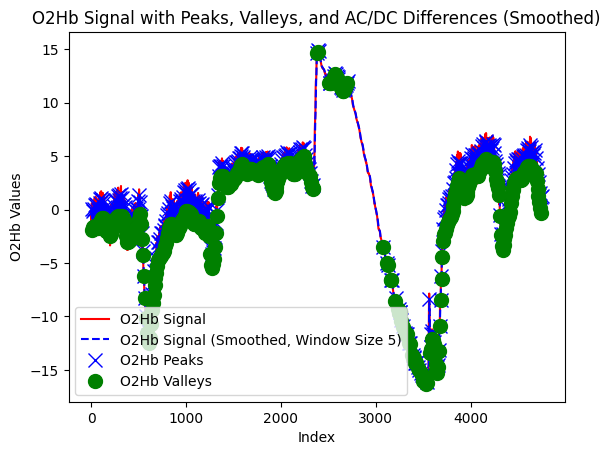

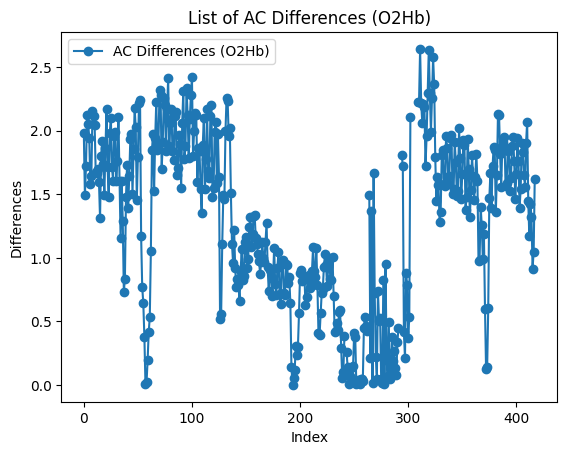

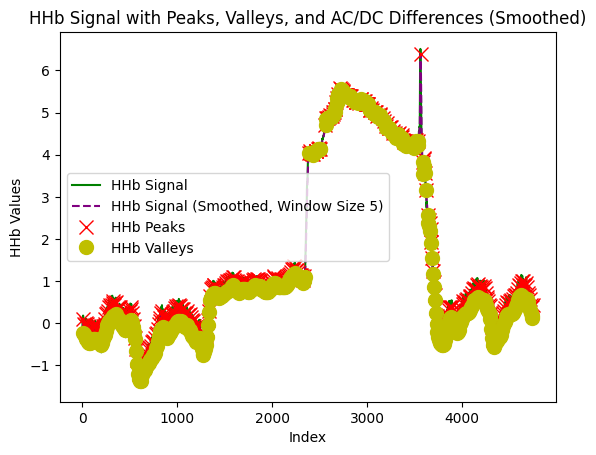

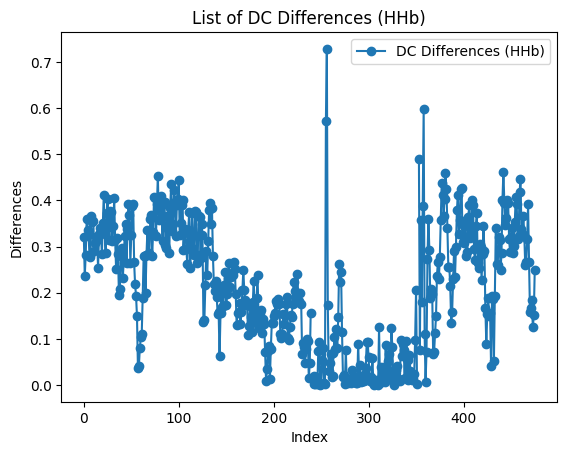

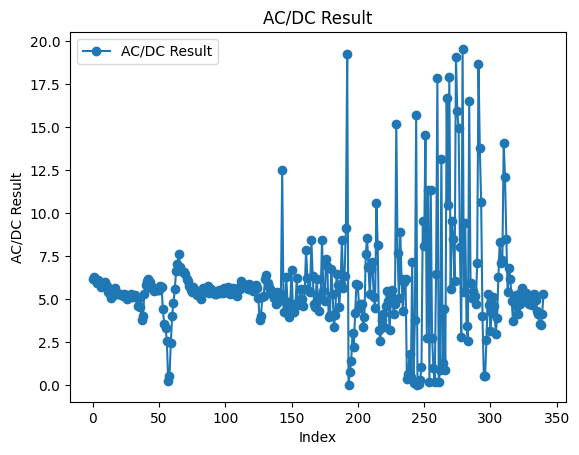

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/smomtahe/ai/main/dataFilterN.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Extract the "O2Hb1" and "HHb1" columns
o2hb_column = df['O2Hb2']
hhb_column = df['HHB2']

# Apply a moving average filter to smooth the O2Hb signal
window_size = 5  # Adjust the window size as needed
o2hb_smoothed = o2hb_column.rolling(window=window_size).mean()

# Apply a moving average filter to smooth the HHb signal
hhb_smoothed = hhb_column.rolling(window=window_size).mean()

# Find peaks on the smoothed O2Hb signal
peaks_o2hb_smoothed = [i for i in range(1, len(o2hb_smoothed)-1) if o2hb_smoothed.iloc[i] > o2hb_smoothed.iloc[i-1] and o2hb_smoothed.iloc[i] > o2hb_smoothed.iloc[i+1]]

# Find valleys on the smoothed O2Hb signal
valleys_o2hb_smoothed = [i for i in range(1, len(o2hb_smoothed)-1) if o2hb_smoothed.iloc[i] < o2hb_smoothed.iloc[i-1] and o2hb_smoothed.iloc[i] < o2hb_smoothed.iloc[i+1]]

# Find peaks on the smoothed HHb signal
peaks_hhb_smoothed = [i for i in range(1, len(hhb_smoothed)-1) if hhb_smoothed.iloc[i] > hhb_smoothed.iloc[i-1] and hhb_smoothed.iloc[i] > hhb_smoothed.iloc[i+1]]

# Find valleys on the smoothed HHb signal
valleys_hhb_smoothed = [i for i in range(1, len(hhb_smoothed)-1) if hhb_smoothed.iloc[i] < hhb_smoothed.iloc[i-1] and hhb_smoothed.iloc[i] < hhb_smoothed.iloc[i+1]]

# Calculate AC (O2Hb) and DC (HHb) differences
ac_differences = [abs(o2hb_smoothed.iloc[peak] - o2hb_smoothed.iloc[valley]) for peak, valley in zip(peaks_o2hb_smoothed, valleys_o2hb_smoothed)]
dc_differences = [abs(hhb_smoothed.iloc[peak] - hhb_smoothed.iloc[valley]) for peak, valley in zip(peaks_hhb_smoothed, valleys_hhb_smoothed)]

# Filter out O2Hb differences greater than 3 and HHb differences greater than 1
ac_differences_filtered = [diff if diff <= 3 else np.nan for diff in ac_differences]
dc_differences_filtered = [diff if diff <= 1 else np.nan for diff in dc_differences]

# Calculate AC/DC result
ac_dc_result = [ac / (dc + 1e-10) for ac, dc in zip(ac_differences_filtered, dc_differences_filtered) if not np.isnan(dc) and ac / (dc + 1e-10) <= 20]  # Exclude values above 5000

# Plot the original and smoothed O2Hb signals with detected peaks and valleys
plt.plot(o2hb_column, label='O2Hb Signal', color='red')
plt.plot(o2hb_smoothed, label=f'O2Hb Signal (Smoothed, Window Size {window_size})', linestyle='--', color='blue')
plt.plot(peaks_o2hb_smoothed, o2hb_smoothed.iloc[peaks_o2hb_smoothed], 'bx', label='O2Hb Peaks', markersize=10)
plt.plot(valleys_o2hb_smoothed, o2hb_smoothed.iloc[valleys_o2hb_smoothed], 'go', label='O2Hb Valleys', markersize=10)
plt.title('O2Hb Signal with Peaks, Valleys, and AC/DC Differences (Smoothed)')
plt.xlabel('Index')
plt.ylabel('O2Hb Values')
plt.legend()

# Plot the list of AC (O2Hb) differences
plt.figure()
plt.plot(ac_differences_filtered, label='AC Differences (O2Hb)', marker='o')
plt.title('List of AC Differences (O2Hb)')
plt.xlabel('Index')
plt.ylabel('Differences')
plt.legend()

# Plot the original and smoothed HHb signals with detected peaks and valleys
plt.figure()
plt.plot(hhb_column, label='HHb Signal', color='green')
plt.plot(hhb_smoothed, label=f'HHb Signal (Smoothed, Window Size {window_size})', linestyle='--', color='purple')
plt.plot(peaks_hhb_smoothed, hhb_smoothed.iloc[peaks_hhb_smoothed], 'rx', label='HHb Peaks', markersize=10)
plt.plot(valleys_hhb_smoothed, hhb_smoothed.iloc[valleys_hhb_smoothed], 'yo', label='HHb Valleys', markersize=10)
plt.title('HHb Signal with Peaks, Valleys, and AC/DC Differences (Smoothed)')
plt.xlabel('Index')
plt.ylabel('HHb Values')
plt.legend()

# Plot the list of DC (HHb) differences
plt.figure()
plt.plot(dc_differences_filtered, label='DC Differences (HHb)', marker='o')
plt.title('List of DC Differences (HHb)')
plt.xlabel('Index')
plt.ylabel('Differences')
plt.legend()

# Plot the AC/DC result
plt.figure()
plt.plot(ac_dc_result, label='AC/DC Result', marker='o')
plt.title('AC/DC Result')
plt.xlabel('Index')
plt.ylabel('AC/DC Result')
plt.legend()

plt.show()


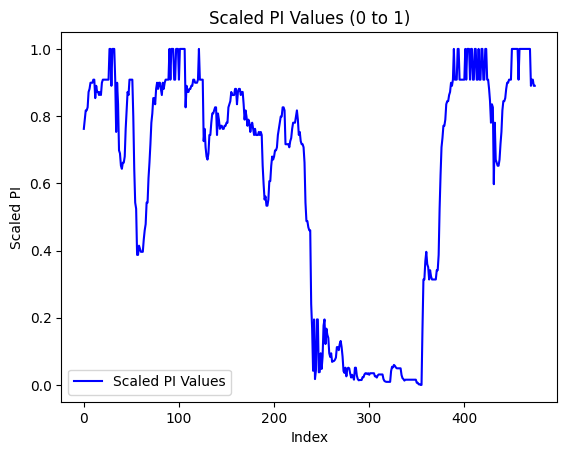

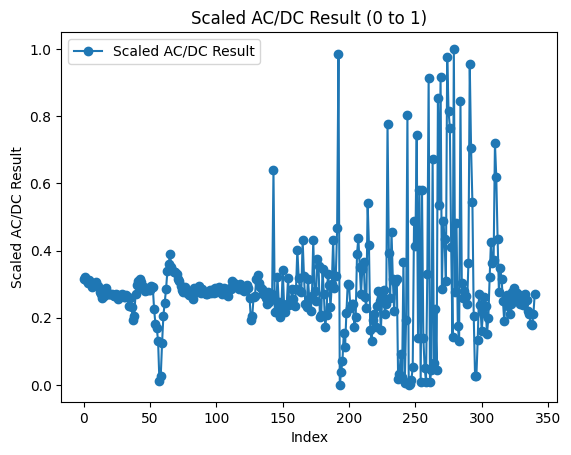

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming you have AC, TSI, and PI data in separate columns in a DataFrame
# Replace 'alignedData.xlsx' with the actual file or data source
df = pd.read_csv('https://raw.githubusercontent.com/smomtahe/ai/main/dataFilter.csv')

# Extract PI values from the DataFrame
pi_values = df['PI2']

# Normalize PI values to the range of 0 to 1
pi_scaler = MinMaxScaler()
pi_values_scaled = pi_scaler.fit_transform(pi_values.values.reshape(-1, 1))

# Plot scaled PI values
plt.plot(pi_values_scaled, label='Scaled PI Values', color='blue')
plt.title('Scaled PI Values (0 to 1)')
plt.xlabel('Index')
plt.ylabel('Scaled PI')
plt.legend()
plt.show()


# Assuming ac_dc_result is the list containing your AC/DC results

# Normalize AC/DC results to the range of 0 to 1
ac_dc_scaler = MinMaxScaler()
ac_dc_result_scaled = ac_dc_scaler.fit_transform(np.array(ac_dc_result).reshape(-1, 1))

# Plot scaled AC/DC results
plt.figure()
plt.plot(ac_dc_result_scaled, label='Scaled AC/DC Result', marker='o')
plt.title('Scaled AC/DC Result (0 to 1)')
plt.xlabel('Index')
plt.ylabel('Scaled AC/DC Result')
plt.legend()

plt.show()


In [ ]:
len(ac_differences_filtered) #418
len(dc_differences_filtered) #476

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Assuming you have AC, TSI, and PI data in separate columns in a DataFrame
# Replace 'your_data.csv' with the actual file or data source
df = pd.read_csv('https://raw.githubusercontent.com/smomtahe/ai/main/dataFilter.csv')

# Assuming AC, TSI, and PI columns are named 'AC', 'TSI', and 'PI' respectively
ac_values = ac_differences_filtered
dc_values = dc_differences_filtered
pi_values = df['PI2']
tsi_values = df['TSI2']

# Number of values to keep (e.g., 474)
target_length = 418

# Adjust lengths of TSI and PI
pi_trimmed = pi_values[:target_length]
tsi_trimmed = tsi_values[:target_length]
dc_differences_filtered = dc_differences_filtered[:target_length]

# Create a DataFrame with the adjusted data
aligned_df = pd.DataFrame({'ac_differences_filtered': ac_values,
                           'dc_differences_filtered': dc_differences_filtered,
                           'tsi_trimmed': tsi_trimmed,
                           'target': pi_trimmed})

# Split the data into features and target
features = aligned_df[['ac_differences_filtered', 'dc_differences_filtered', 'tsi_trimmed']]
target = aligned_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create an imputer to handle missing values (replace NaN with mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data as well
X_test_imputed = imputer.transform(X_test)

# Create a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model with imputed data
rf_model.fit(X_train_imputed, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test_imputed)

# Display the actual target (PI) and the predicted target (pi) side by side
results = pd.DataFrame({'Actual PI': y_test, 'Predicted PI': predictions})

# Calculate accuracy (you can use different metrics based on your requirements)
accuracy = r2_score(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)

# Print the accuracy
print(f"Accuracy: {accuracy}")
print(f"Mean Squared Error (MSE): {MSE}")

# Show actual and predicted targets for rows 5 to 25
print("Actual vs Predicted Targets:")
print(aligned_df.iloc[5:26][['target']].assign(Predicted_PI=predictions[5:26]))

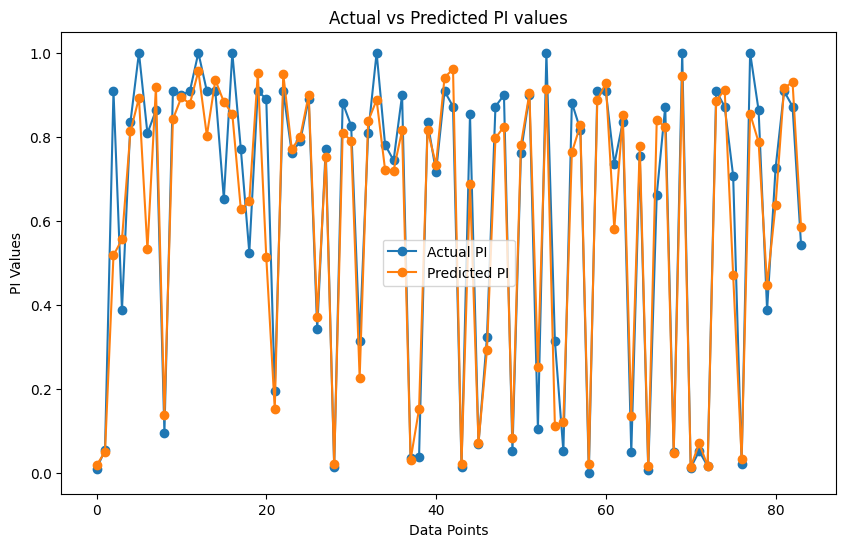

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual and predicted PI values
plt.figure(figsize=(10, 6))

# Plotting actual PI values
plt.plot(y_test.values, label='Actual PI', marker='o')

# Plotting predicted PI values
plt.plot(predictions, label='Predicted PI', marker='o')

# Adding labels and title
plt.xlabel('Data Points')
plt.ylabel('PI Values')
plt.title('Actual vs Predicted PI values')
plt.legend()

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Assuming you have AC, TSI, and PI data in separate columns in a DataFrame
# Replace 'your_data.csv' with the actual file or data source
df = pd.read_csv('https://raw.githubusercontent.com/smomtahe/ai/main/dataFilter.csv')

# Assuming AC, TSI, and PI columns are named 'AC', 'TSI', and 'PI' respectively
ac_values = ac_differences_filtered
dc_values = dc_differences_filtered
pi_values = df['PI2']
tsi_values = df['TSI2']

# Number of values to keep (e.g., 474)
target_length = 418

# Adjust lengths of TSI and PI
pi_trimmed = pi_values[:target_length]
tsi_trimmed = tsi_values[:target_length]
dc_differences_filtered = dc_differences_filtered[:target_length]

# Create a DataFrame with the adjusted data
aligned_df = pd.DataFrame({'ac_differences_filtered': ac_values,
                           'dc_differences_filtered': dc_differences_filtered,
                           'tsi_trimmed': tsi_trimmed,
                           'target': pi_trimmed})

# Split the data into features and target
features = aligned_df[['ac_differences_filtered', 'dc_differences_filtered', 'tsi_trimmed']]
target = aligned_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create an imputer to handle missing values (replace NaN with mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data as well
X_test_imputed = imputer.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

# Make predictions on the test set
predictions = model.predict(X_test_scaled).flatten()

# Calculate accuracy (you can use different metrics based on your requirements)
accuracy = r2_score(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)

# Print the accuracy
print(f"Accuracy: {accuracy}")
print(f"Mean Squared Error (MSE): {MSE}")

# Show actual and predicted targets for rows 5 to 25
print("Actual vs Predicted Targets:")
print(aligned_df.iloc[5:26][['target']].assign(Predicted_PI=predictions[5:26]))


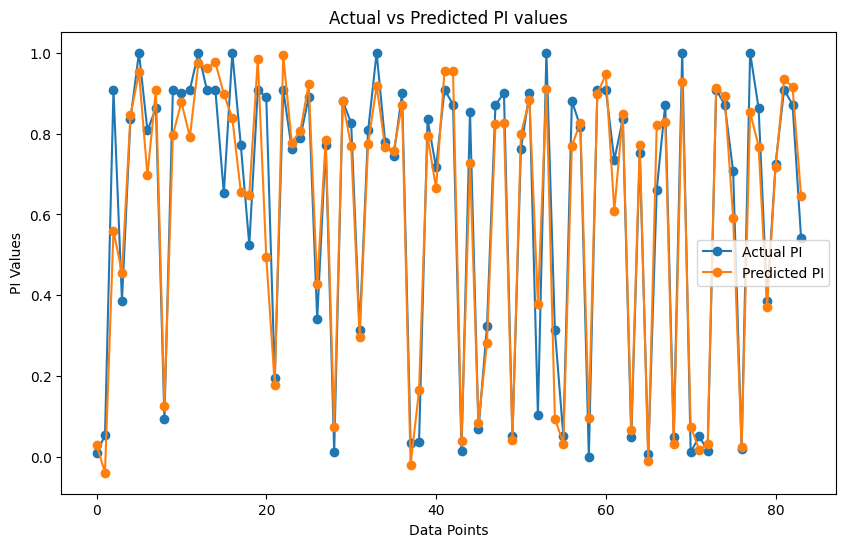

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual and predicted PI values
plt.figure(figsize=(10, 6))

# Plotting actual PI values
plt.plot(y_test.values, label='Actual PI', marker='o')

# Plotting predicted PI values
plt.plot(predictions, label='Predicted PI', marker='o')

# Adding labels and title
plt.xlabel('Data Points')
plt.ylabel('PI Values')
plt.title('Actual vs Predicted PI values')
plt.legend()

# Display the plot
plt.show()
